**Проект "АНО Благотворительная клиника"**

__Материалы:__  
[Презентация](https://www.dropbox.com/scl/fi/d8r2ke2mzydr6g9ezaego/.pdf?rlkey=642fht7tlpk54duu1ma96y88e&dl=0)  

__План (декомпозиция) анализа данных:__  
1. Введение.  
  1.1. Описание проекта.  
  1.2. Цель проекта.  
  1.3. Описание данных.  
2. Загрузка данных и изучение общей информации.  
  2.1. Импорт библиотек.  
  2.2. Загрузка данных.  
  2.3. Рассмотрение общей информации.  
  2.4. Промежуточный вывод.  
3. Предобработка данных.  
  3.1. Переименование столбцов.  
  3.2. Преобразование типов данных.  
  3.3. Обработка пропусков.  
  3.4. Удаление дубликатов.  
  3.5. Удаление лишних или пустых колонок.  
  3.6. Объединение данных.  
  3.7. Промежуточный вывод.   
4. Исследовательский анализ данных.  
  4.1. Исследование доноров.  
  4.2. Расчет конверсии.  
  4.3. Анализ рекламных кампаний.  
5. Выводы и рекомендации.  
  5.1. Общие выводы.  
  5.2. Рекомендации.  

#  1. Введение.

## 1.1. Описание проекта.

АНО "Благотворительная клиника" оказывает медико-социальную помощь бездомным людям Петербурга с 2018 года.
Заказчики предоставили все имеющиеся данные с просьбой извлечь из них максимум пользы.

## 1.2. Цель проекта.

Проанализировать эффективность маркетингового подхода на основе данных о пожертвованиях и рекламных кампаниях.

## 1.3. Описание данных.

Обезличенные данные о платежах. Данные выкачаны из двух систем, некоторые платежи присутствуют в обоих файлах. Колонка "Код" создана для поиска пересечений по файлам.

Данные Яндекс.метрики (только за 2023 год).

#  2. Загрузка данных и изучение общей информации.

## 2.1. Импорт библиотек.

In [ ]:
# Загрузим библиотеки
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import graph_objects as go

In [ ]:
# Установим параметр отображения максимального количества столбцов
pd.set_option('display.max_columns', None)

Загрузили необходимые библиотеки, подключили Google Drive и установили параметры отображения максимального количества столбцов.

## 2.2. Загрузка данных.

In [ ]:
# Загрузим датасеты в переменные
donors = pd.read_excel('/donors.xls')
clients = pd.read_excel('/clients.xsl')
adgrants_total = pd.read_csv('/adgrants.csv', sep =";", nrows = 2) # загрузим общую информацию
adgrants = pd.read_csv('/adgrants.csv', sep=';', skiprows=4) # первые три строки с общей информацией, поэтому их пропускаем

In [ ]:
# Посмотрим на первые пять строк датасетов
display(donors.head())
print()
display(clients.head())
print()
display(adgrants_total.head())
print()
adgrants.head()

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289


,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Клиент АНО медико-социальной помощи «Благотворительная больница» (adgrants-charityhospital), период 19.07.2022 - 19.07.2023"
Всего,NaN,Ср.расход за день (руб.),Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Ср. позиция показов,Ср. объём трафика,Ср. позиция кликов,Отказы (%),Ср. цена тыс. показов (руб.),Глубина (стр.),Конверсия (%),Цена цели (руб.),Конверсии,Рентабельность,Доля рекламных расходов,Доход (руб.),Прибыль (руб.),Сумма ВC,Цена ВC (руб.),Доля ВC (%),Проигрывание 25% ролика,Проигрывание 50% ролика,Проигрывание 75% ролика,Проигрывание 100% ролика,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
с 19.07.2022 по 19.07.2023,NaN,"5468,02",9853586,"9853586,00",41243,"0,42","0,42","825670,64","20,02","29,15",-,"100,00",-,"37,05","83,79","1,21","1,19","1678,19",492,"-0,20","124,61","662600,00","-163070,64","112,55","7336,19","0,27",117682,83308,69513,62947,"1,19","0,85","0,71","0,64","13,1169",7348,11157,0,"100,00","39,71"


,Дата,Кампания,№ Кампании,Метка,Условие показа,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Ср. позиция показов,Ср. объём трафика,Ср. позиция кликов,Отказы (%),Ср. цена тыс. показов (руб.),Глубина (стр.),Конверсия (%),Цена цели (руб.),Конверсии,Рентабельность,Доля рекламных расходов,Доход (руб.),Прибыль (руб.),Сумма ВC,Цена ВC (руб.),Доля ВC (%),Проигрывание 25% ролика,Проигрывание 50% ролика,Проигрывание 75% ролика,Проигрывание 100% ролика,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
0,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7,"7,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,-,"0,00",-,-,-,-,-,-,"0,00","0,00",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
1,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4,"4,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,-,"0,00",-,-,-,-,-,-,"0,00","0,00",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2,"2,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,-,"0,00",-,-,-,-,-,-,"0,00","0,00",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1,"1,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,-,"0,00",-,-,-,-,-,-,"0,00","0,00",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1,"1,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,-,"0,00",-,-,-,-,-,-,"0,00","0,00",-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


## 2.3. Рассмотрение общей информации.

Посмотрим на типы данных и наличие пропусков.

In [ ]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 813 non-null    int64  
 1   Тип донора                         813 non-null    object 
 2   Дата первого пожертвования         795 non-null    object 
 3   Сумма первого пожертвования        795 non-null    float64
 4   Кампания первого пожертвования     795 non-null    object 
 5   Метки донора                       0 non-null      float64
 6   Кампании                           795 non-null    object 
 7   Платёжные операторы                795 non-null    object 
 8   Дата последнего пожертвования      795 non-null    object 
 9   Сумма последнего пожертвования     795 non-null    float64
 10  Кампания последнего пожертвования  795 non-null    object 
 11  Общая сумма пожертвований          813 non-null    int64  

In [ ]:
clients.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1166 non-null   int64         
 1   Первый платеж         1166 non-null   datetime64[ns]
 2   Подписки вкл          1166 non-null   int64         
 3   Подписки выкл         1166 non-null   int64         
 4   Типы оплаты           998 non-null    object        
 5   Платежей за год       1166 non-null   int64         
 6   Сумма за год          1166 non-null   int64         
 7   Средний платеж в год  1166 non-null   object        
 8   Всего платежей        1166 non-null   int64         
 9   Сумма всего           1166 non-null   int64         
 10  Средний платеж        1166 non-null   object        
 11  Сумма за месяц        1166 non-null   int64         
 12  Страны                922 non-null    object        
 13  Регионы           

In [ ]:
adgrants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308023 entries, 0 to 308022
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Дата                                       308023 non-null  object
 1   Кампания                                   308023 non-null  object
 2   № Кампании                                 308023 non-null  int64 
 3   Метка                                      308023 non-null  object
 4   Условие показа                             308023 non-null  object
 5   Пол                                        308023 non-null  object
 6   Уровень платежеспособности                 308023 non-null  object
 7   Возраст                                    308023 non-null  object
 8   Показы                                     308023 non-null  int64 
 9   Взвешенные показы                          308023 non-null  object
 10  Клики               

## 2.4. Промежуточный вывод

Загрузили данные и изучили общую информацию:  
- Загрузили необходимые библиотеки, подключили Google Drive и установили параметры отображения максимального количества столбцов.
- Датасет `donors` имеет 813 строк, `clients` - 1166 строк, `adgrants` - 308023 строки.
- Наименования колонок написаны на кириллице.  
- Столбцы `Дата`, `Дата первого пожертвования`, `Дата последнего пожертвования` имеют тип `object` вместо `datetime`.
- Столбцы `Средний платеж`, `Средний платеж в год` имеют тип `object` вместо `float`.
- Столбцы `Взвешенные показы`, `CTR`, `CTR (%)` и все последующие столбцы имеют тип `object` вместо `float` из-за разделителя `,` вместо `.`.
- Видим пропуски в `Дата первого пожертвования`, `Сумма первого пожертвования`, `Кампания первого пожертвования`, `Метки донора`, `Кампании`, `Платёжные операторы`, `Дата последнего пожертвования`, `Сумма последнего пожертвования`, `Кампания последнего пожертвования`, `Типы оплаты`, `Страны` и `Регионы`.
- В датасете `adgrants` пропуски обозначены "-", поэтому метод info() показывает их отсутствие.

#  3. Предобработка данных.

## 3.1. Переименование столбцов.

Приведем столбцы к единому стилю.

In [ ]:
adgrants.columns.tolist()

['Дата',
 'Кампания',
 '№ Кампании',
 'Метка',
 'Условие показа',
 'Пол',
 'Уровень платежеспособности',
 'Возраст',
 'Показы',
 'Взвешенные показы',
 'Клики',
 'CTR (%)',
 'wCTR (%)',
 'Расход (руб.)',
 'Ср. цена клика (руб.)',
 'Ср. ставка за клик (руб.)',
 'Ср. позиция показов',
 'Ср. объём трафика',
 'Ср. позиция кликов',
 'Отказы (%)',
 'Ср. цена тыс. показов (руб.)',
 'Глубина (стр.)',
 'Конверсия (%)',
 'Цена цели (руб.)',
 'Конверсии',
 'Рентабельность',
 'Доля рекламных расходов',
 'Доход (руб.)',
 'Прибыль (руб.)',
 'Сумма ВC',
 'Цена ВC (руб.)',
 'Доля ВC (%)',
 'Проигрывание 25% ролика',
 'Проигрывание 50% ролика',
 'Проигрывание 75% ролика',
 'Проигрывание 100% ролика',
 'Доля проигрываний 25% ролика (%)',
 'Доля проигрываний 50% ролика (%)',
 'Доля проигрываний 75% ролика (%)',
 'Доля проигрываний 100% ролика (%)',
 'Ср. цена досмотра 100% ролика (руб.)',
 'Видимые показы, стандарт MRC',
 'Невидимые показы, стандарт MRC',
 'Неустановленные показы, стандарт MRC',
 'Доля из

In [ ]:
donors = donors.rename(columns={'ID': 'donor_id',
                                'Тип донора': 'donor_type',
                                'Дата первого пожертвования': 'first_donation_date',
                                'Сумма первого пожертвования': 'first_donation_amount',
                                'Кампания первого пожертвования': 'first_donation_campaign',
                                'Метки донора': 'donor_tag',
                                'Кампании': 'campaign',
                                'Платёжные операторы': 'payment_operator',
                                'Дата последнего пожертвования': 'last_donation_date',
                                'Сумма последнего пожертвования': 'last_donation_amount',
                                'Кампания последнего пожертвования': 'last_donation_campaign',
                                'Общая сумма пожертвований': 'donation_sum',
                                'Валюта': 'currency',
                                'Код': 'code'})
clients = clients.rename(columns={'id': 'donor_id',
                                  'Первый платеж': 'first_donation_date',
                                  'Подписки вкл': 'subscriptions_on',
                                  'Подписки выкл': 'subscriptions_off',
                                  'Типы оплаты': 'payment_type',
                                  'Платежей за год': 'payments_per_year_count',
                                  'Сумма за год': 'payments_per_year_sum',
                                  'Средний платеж в год': 'payments_per_year_avg',
                                  'Всего платежей': 'payments_count',
                                  'Сумма всего': 'payments_sum',
                                  'Средний платеж': 'payments_avg',
                                  'Сумма за месяц': 'payments_sum_per_month',
                                  'Страны': 'country',
                                  'Регионы': 'region',
                                  'Последний платеж': 'last_donation_date',
                                  'код': 'code'})
adgrants = adgrants.rename(columns={'Дата': 'date',
                                    'Кампания': 'campaign',
                                    '№ Кампании': 'campaign_num',
                                    'Метка': 'tag',
                                    'Условие показа': 'condition',
                                    'Пол': 'gender',
                                    'Уровень платежеспособности': 'solvency_level',
                                    'Возраст': 'age',
                                    'Показы': 'impressions',
                                    'Взвешенные показы': 'w_impressions',
                                    'Клики': 'clicks',
                                    'CTR (%)': 'ctr',
                                    'wCTR (%)': 'wctr',
                                    'Расход (руб.)': 'costs',
                                    'Ср. цена клика (руб.)': 'avg_cost_per_click',
                                    'Ср. ставка за клик (руб.)': 'avg_bid_per_click',
                                    'Ср. позиция показов': 'avg_position_of_impression',
                                    'Ср. объём трафика': 'avg_traffic',
                                    'Ср. позиция кликов': 'avg_position_of_clicks',
                                    'Отказы (%)':  'failures',
                                    'Ср. цена тыс. показов (руб.)': 'avg_cost_1000_impressions',
                                    'Глубина (стр.)': 'depth',
                                    'Конверсия (%)': 'convertion_perc',
                                    'Цена цели (руб.)': 'target_price',
                                    'Конверсии': 'convertions',
                                    'Рентабельность': 'profitability',
                                    'Доля рекламных расходов': 'adv_expenses_share',
                                    'Доход (руб.)': 'income',
                                    'Прибыль (руб.)': 'profit',
                                    'Сумма ВC': 'vs_sum',
                                    'Цена ВC (руб.)': 'vs_price',
                                    'Доля ВC (%)': 'vs_share',
                                    'Проигрывание 25% ролика': 'playing_video_25',
                                    'Проигрывание 50% ролика': 'playing_video_50',
                                    'Проигрывание 75% ролика': 'playing_video_75',
                                    'Проигрывание 100% ролика': 'playing_video_100',
                                    'Доля проигрываний 25% ролика (%)': 'playing_video_25_share',
                                    'Доля проигрываний 50% ролика (%)': 'playing_video_50_share',
                                    'Доля проигрываний 75% ролика (%)': 'playing_video_75_share',
                                    'Доля проигрываний 100% ролика (%)': 'playing_video_100_share',
                                    'Ср. цена досмотра 100% ролика (руб.)': 'avg_cost_100_playing_video',
                                    'Видимые показы, стандарт MRC': 'va_impressions',
                                    'Невидимые показы, стандарт MRC': 'non_va_impressions',
                                    'Неустановленные показы, стандарт MRC': 'unmeasured_impressions',
                                    'Доля измеряемых показов, стандарт MRC (%)': 'measured_impressions_rate',
                                    'Доля видимых показов, стандарт MRC (%)': 'va_rate'})

Переименовали столбцы с кириллицы на латиницу в представленных датасетах.

## 3.2. Преобразование типов данных.

Изменим тип столбцов `first_donation_date`, `last_donation_date` в датасете `donors` и `date` в датасете `adgrants` с `object` на `datetime`.

In [ ]:
donors.first_donation_date = pd.to_datetime(donors.first_donation_date, format="%d.%m.%Y, %H:%M")
donors.last_donation_date = pd.to_datetime(donors.last_donation_date, format="%d.%m.%Y, %H:%M")
adgrants.date = pd.to_datetime(adgrants.date, format="%d.%m.%Y")

Заменим в датасете `adgrants` ' - ' на 'NaN' для того, чтобы в дальнейшем оценить количество пропусков.

In [ ]:
adgrants = adgrants.replace("-", np.nan)

Заменим в датасете `adgrants` ' , ' на ' . ' для того, чтобы строки заменить на числа.

In [ ]:
adgrants = adgrants.replace(",", ".", regex=True)

Заменим в датасете `adgrants` значение `ctr`, `convertion_perc`, `convertions` на числовое.


In [ ]:
adgrants.ctr = pd.to_numeric(adgrants.ctr)
adgrants.convertion_perc = pd.to_numeric(adgrants.convertion_perc)
adgrants.convertions = pd.to_numeric(adgrants.convertions)

Изменили типа данных столбцов `first_donation_date`, `last_donation_date` в датасете `donors` и `date` в датасете `adgrants` с `object` на `datetime`. Заменили в датасете `adgrants` значение `ctr`, `convertion_perc`, `convertions` на числовое и ' , ' на ' . ' для того, чтобы строки заменить на числа.

## 3.3. Обработка пропусков.

Посмотрим на пропуски в датасетах.

In [ ]:
pd.DataFrame(round(clients.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
donor_id,0.000000
first_donation_date,0.000000
subscriptions_on,0.000000
subscriptions_off,0.000000
payment_type,14.400000
payments_per_year_count,0.000000
payments_per_year_sum,0.000000
payments_per_year_avg,0.000000
payments_count,0.000000
payments_sum,0.000000


В датасете `clients` имеются пропуски в столбцах `payment_type` (14,4%), `country` (20,9%), `region` (23,2%).

In [ ]:
pd.DataFrame(round(donors.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
donor_id,0.000000
donor_type,0.000000
first_donation_date,2.200000
first_donation_amount,2.200000
first_donation_campaign,2.200000
donor_tag,100.000000
campaign,2.200000
payment_operator,2.200000
last_donation_date,2.200000
last_donation_amount,2.200000


В датасете `donors` имеются пропуски в столбцах `first_donation_date` (2,2%), `first_donation_amount` (2,2%), `first_donation_campaign` (2,2%), `campaign` (2,2%), `payment_operator` (2,2%), `last_donation_day` (2,2%), `last_donation_amount` (2,2%), `last_donation_campaign` (2,2%) и полность отсутствуют данные в столбце `donor_tag` (100%).

In [ ]:
pd.DataFrame(round(adgrants.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
date,0.000000
campaign,0.000000
campaign_num,0.000000
tag,0.000000
condition,0.000000
gender,0.000000
solvency_level,0.000000
age,0.000000
impressions,0.000000
w_impressions,0.000000


В датасете `adgrants` пропущены значения 90,3% данных в столбцах `playing_video_25`, `playing_video_50`, `playing_video_75`, `playing_video_100`, `playing_video_25_share`, `playing_video_50_share`, `playing_video_75_share`, `playing_video_100_share`, 94,2% - `avg_cost_per_click`, `avg_bid_per_click`, 96.6% - `avg_cost_100_playing_video`, 98.2% - `failures`, 98.3% - `depth`,
99.9% - `convertion_perc`, `target_price`, `convertions` и полностью отсутствуют данные (100%) в столбцах `avg_position_of_impression`, `avg_position_of_clicks`, `profitability`, `adv_expenses_share`, `vs_sum`, `vs_price`, `vs_share`, `va_impressions`, `non_va_impressions`, `unmeasured_impressions`, `measured_impressions_rate`, `va_rate`.

Данные столбцы с пропусками, кроме `convertion_perc`, `convertions`, в нашем исследовании не представляют интереса, из можно удалить. Также можно удалить столбцы `avg_traffic`, `avg_cost_1000_impressions`, `income`, `profit`.

## 3.4. Удаление дубликатов.  


Рассмотрим датасеты на наличие явных дубликатов.

In [ ]:
print(f'Количество дубликатов в `donors`: {donors.duplicated().sum()}')
print(f'Количество дубликатов в `clients`: {clients.duplicated().sum()}')
print(f'Количество дубликатов в `adgrants`: {adgrants.duplicated().sum()}')

Количество дубликатов в `donors`: 0
Количество дубликатов в `clients`: 0
Количество дубликатов в `adgrants`: 25


В датасете `adgrants` найдено 25 дубликатов, удалим их.

In [ ]:
adgrants = adgrants.drop_duplicates().reset_index(drop=True)

Изучим уникальные значения в столбцах с названиями и выявим неявные дубликаты.

In [ ]:
print(f'Столбец `donor_type`: {donors.donor_type.unique()}')
print()
print(f'Столбец `first_donation_campaign`: {donors.first_donation_campaign.unique()}')
print()
print(f'Столбец `campaign`: {donors.campaign.unique()}')
print()
print(f'Столбец `payment_operator	`: {donors.payment_operator	.unique()}')
print()
print(f'Столбец `last_donation_campaign`: {donors.last_donation_campaign.unique()}')
print()
print(f'Столбец `payment_type`: {clients.payment_type.unique()}')
print()
print(f'Столбец `country`: {clients.country.unique()}')
print()
print(f'Столбец `region`: {clients.region.unique()}')
print()
print(f'Столбец `campaign`: {adgrants.campaign.unique()}')
print()
print(f'Столбец `tag`: {adgrants.tag.unique()}')
print()
print(f'Столбец `condition`: {adgrants.condition.unique()}')
print()
print(f'Столбец `gender`: {adgrants.gender.unique()}')
print()
print(f'Столбец `solvency_level`: {adgrants.solvency_level.unique()}')
print()
print(f'Столбец `age`: {adgrants.age.unique()}')
print()
print(f'Столбец `campaign_num`: {adgrants.campaign_num.unique()}')

Столбец `donor_type`: ['разовый' 'постоянный']

Столбец `first_donation_campaign`: ['На уставную деятельность и содержание организации' nan '#Больничкабежит']

Столбец `campaign`: ['На уставную деятельность и содержание организации' nan '#Больничкабежит'
 '#Больничкабежит, На уставную деятельность и содержание организации']

Столбец `payment_operator	`: ['MIXPLAT' 'MIXPLAT, Квитанции' nan 'Сбербанк Эквайринг'
 'MIXPLAT, Сбербанк Эквайринг']

Столбец `last_donation_campaign`: ['На уставную деятельность и содержание организации' nan '#Больничкабежит']

Столбец `payment_type`: ['карта' nan 'sms,карта' 'терм,СБП' 'sms' 'карта,терм,СБП'
 'sms,карта,терм,СБП' 'sms,терм,СБП']

Столбец `country`: [nan 'Россия' 'Нидерланды\nРоссия\nСША' 'Россия\nСША' 'Нидерланды' 'Чехия'
 'Белоруссия' 'США' 'Латвия' 'Грузия' 'Швеция' 'Сингапур' 'Латвия\nРоссия'
 'Германия' 'США\nФинляндия' 'Россия\nСербия\nСША' 'Финляндия' 'Венгрия'
 'Нидерланды\nРоссия' 'Франция' 'Армения' 'Канада' 'ОАЭ' 'Литва'
 'Германия\nРо

Неявные дубликаты в названиях столбцов отсутствуют.

Рассмотрим в датасете `donors` столбцы с первым, последним и общей суммой пожертвований.


In [ ]:
# Случай, когда совпадает дата первого и последнего платежей и размер первого, последнего и общая сумма пожертвования
donors.query('first_donation_date == last_donation_date & first_donation_amount == last_donation_amount == donation_sum').shape[0]

423

В случае совпадения в датасете `donors` значений столбцов `first_donation_date` с `last_donation_date` и `first_donation_amount` с `last_donation_amount` и `donation_sum` заменим `last_donation_date` и `last_donation_amount` на `NaN`.

In [ ]:
condition = (donors['first_donation_date'] == donors['last_donation_date']) & (donors['first_donation_amount'] == donors['last_donation_amount']) & (donors['last_donation_amount'] == donors['donation_sum'])

donors.loc[condition, ['last_donation_date', 'last_donation_amount', 'last_donation_campaign']] = np.nan

In [ ]:
# Случай, когда совпадает дата первого и последнего платежей
donors.query('first_donation_date == last_donation_date').shape[0]

1

In [ ]:
donors.query('first_donation_date == last_donation_date')

,donor_id,donor_type,first_donation_date,first_donation_amount,first_donation_campaign,donor_tag,campaign,payment_operator,last_donation_date,last_donation_amount,last_donation_campaign,donation_sum,currency,code
287,545,разовый,2023-02-27 13:40:00,50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,2023-02-27 13:40:00,500.0,На уставную деятельность и содержание организации,500,₽,2010


В этом случае заменим `first_donation_amount` на 500, а `last_donation_date` и `last_donation_amount` на `NaN`.

In [ ]:
condition = (donors['first_donation_date'] == donors['last_donation_date'])

donors.loc[condition, 'first_donation_amount'] = 500
donors.loc[condition, ['last_donation_date', 'last_donation_amount', 'last_donation_campaign']] = np.nan

In [ ]:
# Случай, когда совпадает размер первого, последнего и общая сумма пожертвования
donors.query('first_donation_amount == last_donation_amount == donation_sum').shape[0]

32

В этом случае заменим `last_donation_date`, `last_donation_amount` и `last_donation_amount` на `NaN`.

In [ ]:
condition = (donors['first_donation_amount'] == donors['last_donation_amount']) & (donors['last_donation_amount'] == donors['donation_sum'])

donors.loc[condition, ['last_donation_date', 'last_donation_amount', 'last_donation_campaign']] = np.nan

In [ ]:
# Случай, когда сумма первого и последнего пожертвований больше общей суммы пожертвования
donors.query('first_donation_amount + last_donation_amount > donation_sum').shape[0]

23

В этом случае заменим `donation_sum` на сумму значений `first_donation_amount` и `last_donation_amount`.

In [ ]:
donors.loc[donors['first_donation_amount'] + donors['last_donation_amount'] > donors['donation_sum'], 'donation_sum'] \
= donors['first_donation_amount'] + donors['last_donation_amount']

In [ ]:
# Случай, когда дата первого пожертвования позднее последнего пожертвования
donors.query('first_donation_date > last_donation_date').shape[0]

0

Для уточнения данных заказчику был задан вопрос: в случае когда первое пожертвование (например, 500 руб.) и последнее пожертвование (500 руб.) сделаны в одну дату с разницей в несколько минут (16:36:00 и 16:40:00), то это один платеж или все-таки два? Ответ заказчика: в данном случае это 1 платеж.

Поэтому отсортируем сопадения размеров первого и последнего пожертвования еще и по времени в пределах 1 часа.

In [ ]:
donors[(donors['first_donation_amount'] == donors['last_donation_amount']) & \
 ((donors['last_donation_date'] - donors['first_donation_date']).dt.total_seconds() / 60 < 60)]

,donor_id,donor_type,first_donation_date,first_donation_amount,first_donation_campaign,donor_tag,campaign,payment_operator,last_donation_date,last_donation_amount,last_donation_campaign,donation_sum,currency,code
37,796,постоянный,2023-05-14 16:16:00,500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,2023-05-14 16:17:00,500.0,На уставную деятельность и содержание организации,1000,₽,2240
47,786,постоянный,2023-05-07 21:30:00,12.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,2023-05-07 21:35:00,12.0,На уставную деятельность и содержание организации,25,₽,2222
427,399,разовый,2023-01-02 19:53:00,100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,2023-01-02 20:10:00,100.0,На уставную деятельность и содержание организации,500,₽,1814
515,309,разовый,2022-12-25 14:45:00,100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,2022-12-25 14:46:00,100.0,На уставную деятельность и содержание организации,200,₽,1361


В этом случае заменим `last_donation_date`, `last_donation_amount` и `last_donation_amount` на `NaN`.

In [ ]:
condition = (donors[(donors['first_donation_amount'] == donors['last_donation_amount']) & \
 ((donors['last_donation_date'] - donors['first_donation_date']).dt.total_seconds() / 60 < 60)].shape[0])

donors.loc[condition, ['last_donation_date', 'last_donation_amount', 'last_donation_campaign']] = np.nan

Рассмотрим в датасете `clients` столбцы с перым и последним пожертвованиями.

In [ ]:
# Случай, когда совпадает дата первого и последнего платежей
clients.query('first_donation_date == last_donation_date').shape[0]

608

В этом случае заменим `last_donation_date` на `NaN`.

In [ ]:
condition = (clients['first_donation_date'] == clients['last_donation_date'])

clients.loc[condition, 'last_donation_date'] = np.nan

Заказчик сообщил, что некоторые платежи присутствуют в обоих датасетах. Найдем их.

In [ ]:
# Объединим данные по совпадению даты первого платежа
pd.merge(donors, clients, on=['code', 'first_donation_date'])

,donor_id_x,donor_type,first_donation_date,first_donation_amount,first_donation_campaign,donor_tag,campaign,payment_operator,last_donation_date_x,last_donation_amount,last_donation_campaign,donation_sum,currency,code,donor_id_y,subscriptions_on,subscriptions_off,payment_type,payments_per_year_count,payments_per_year_sum,payments_per_year_avg,payments_count,payments_sum,payments_avg,payments_sum_per_month,country,region,last_donation_date_y
0,669,разовый,2023-03-29 13:10:00,450.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,2023-05-29 13:10:00,450.0,На уставную деятельность и содержание организации,1350,₽,1895,1369208,1,0,карта,3,1350,450,3,1350,450,0,Россия,Санкт-Петербург,2023-05-29 13:10:01


В этом случае удалим дату первого платежа в датасете `clients` и заменим `payments_sum` на 900 рублей.

In [ ]:
condition = (clients['code'] == 1895)

clients.loc[condition, 'first_donation_date'] = np.nan
clients.loc[condition, 'payments_sum'] = 900

In [ ]:
# Объединим данные по совпадению даты последнего платежа
pd.merge(donors, clients, on=['code', 'last_donation_date'])

,donor_id_x,donor_type,first_donation_date_x,first_donation_amount,first_donation_campaign,donor_tag,campaign,payment_operator,last_donation_date,last_donation_amount,last_donation_campaign,donation_sum,currency,code,donor_id_y,first_donation_date_y,subscriptions_on,subscriptions_off,payment_type,payments_per_year_count,payments_per_year_sum,payments_per_year_avg,payments_count,payments_sum,payments_avg,payments_sum_per_month,country,region
0,831,постоянный,2023-06-20 10:39:00,500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,NaT,NaN,NaN,500,₽,1479,858308,2022-06-11 15:04:30,0,0,карта,1,500,500,1,500,500,0,Сингапур,NaN
1,811,постоянный,2023-05-31 15:35:00,200.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,NaT,NaN,NaN,200,₽,2279,1498729,2023-05-31 15:36:27,1,0,карта,1,200,200,1,200,200,0,Франция,Бургундия — Франш-Конте
2,810,постоянный,2023-05-29 08:06:00,1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,NaT,NaN,NaN,1000,₽,2277,1495073,2023-05-29 08:07:01,1,0,карта,1,1000,1000,1,1000,1000,0,Россия,Санкт-Петербург
3,807,разовый,2023-05-22 13:43:00,1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,NaT,NaN,NaN,1000,₽,2262,1483611,2023-05-22 13:44:33,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Калининградская обл.
4,806,разовый,2023-05-22 07:28:00,300.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,NaT,NaN,NaN,300,₽,2261,1483165,2023-05-22 07:29:27,0,0,карта,1,300,300,1,300,300,0,Россия,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,61,разовый,2022-09-01 20:56:00,300.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,NaT,NaN,NaN,300,₽,1522,950674,2022-09-01 20:56:16,0,0,NaN,1,300,300,1,300,300,0,Россия,Санкт-Петербург
295,54,разовый,2022-08-30 14:57:00,500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,NaT,NaN,NaN,500,₽,1519,948415,2022-08-30 14:57:59,0,0,карта,1,500,500,1,500,500,0,Россия,Пермский край
296,51,разовый,2022-08-27 11:53:00,1500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,NaT,NaN,NaN,1500,₽,1518,947436,2022-08-27 11:53:47,0,0,NaN,1,1500,1500,1,1500,1500,0,Россия,Санкт-Петербург
297,41,разовый,2022-08-23 23:32:00,300.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,NaT,NaN,NaN,300,₽,1516,944030,2022-08-23 23:33:25,0,0,NaN,1,300,300,1,300,300,0,Россия,Республика Крым


Таких сопадений нет.

In [ ]:
# Объединим данные по совпадению даты первого платежа в датасете `donors` и последнего платежа в датасете `clients`
pd.merge(donors, clients, left_on=['code', 'first_donation_date'], right_on=['code', 'last_donation_date'])

,donor_id_x,donor_type,first_donation_date_x,first_donation_amount,first_donation_campaign,donor_tag,campaign,payment_operator,last_donation_date_x,last_donation_amount,last_donation_campaign,donation_sum,currency,code,donor_id_y,first_donation_date_y,subscriptions_on,subscriptions_off,payment_type,payments_per_year_count,payments_per_year_sum,payments_per_year_avg,payments_count,payments_sum,payments_avg,payments_sum_per_month,country,region,last_donation_date_y
0,779,разовый,2023-05-02 11:04:00,50.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,NaT,NaN,NaN,50,₽,1185,1451920,2023-05-02 10:58:48,0,0,"карта,терм,СБП",1,50,50,1,50,50,0,Россия,Санкт-Петербург,2023-05-02 11:04:00
1,676,разовый,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0,₽,1928,1371260,2023-03-29 23:10:18,0,0,"терм,СБП",1,50,50,1,50,50,0,Россия,Ленинградская обл.,NaT
2,639,разовый,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0,₽,1857,1367370,2023-03-28 21:59:10,0,0,карта,1,450,450,1,450,450,0,Россия,Ленинградская обл.,NaT
3,580,разовый,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,0,₽,2049,1323866,2023-03-10 17:53:32,0,0,карта,1,450,450,1,450,450,0,Турция,Стамбул,NaT


В этом случае удалим всю строку в датасете `clients`.

In [ ]:
clients = clients.drop(clients.query('code == 1185').index)

In [ ]:
# Объединим данные по совпадению даты последнего платежа в датасете `donors` и первого платежа в датасете `clients`
pd.merge(donors, clients, left_on=['code', 'last_donation_date'], right_on=['code', 'first_donation_date'])

,donor_id_x,donor_type,first_donation_date_x,first_donation_amount,first_donation_campaign,donor_tag,campaign,payment_operator,last_donation_date_x,last_donation_amount,last_donation_campaign,donation_sum,currency,code,donor_id_y,first_donation_date_y,subscriptions_on,subscriptions_off,payment_type,payments_per_year_count,payments_per_year_sum,payments_per_year_avg,payments_count,payments_sum,payments_avg,payments_sum_per_month,country,region,last_donation_date_y


Таких сопадений нет.

В датасете `adgrants` удалили 25 явных дубликатов. Неявные дубликаты в названиях столбцов отсутствуют.

В датасете `donors` скорректировали столбцы с перым, последним и общей суммой пожертвований.

В датасете `clients` скорректировали столбцы с перым и последним пожертвованиями.

Удалили два платежа, которые присутствуют в обоих датасетах `donors` и `clients`.

## 3.5. Удаление лишних или пустых колонок.

Рассмотрим столбцы датасетов подробнее.

In [ ]:
donors.currency.unique()

array(['₽'], dtype=object)

В столбце `currency` только значения ₽, этот столбец можно удалить.

Рассмотрим сколько уникальных значений `donor_id` имеется в датасетах.

In [ ]:
donors.donor_id.nunique()

813

Все значения в датасете `donors` уникальные по `donor_id`.

In [ ]:
clients.donor_id.nunique()

1165

Все значения в датасете `clients` уникальные по `donor_id`.

In [ ]:
adgrants.tag.unique()

array(['без метки'], dtype=object)

В столбце `tag` только значения `без метки`, этот столбец можно удалить.

В датасете `clients` столбцы `subscriptions_on` и `subscriptions_off`, судя по всему должны быть булевыми. Рассмотрим подробнее.

In [ ]:
clients.subscriptions_on.value_counts()

0    935
1    227
2      3
Name: subscriptions_on, dtype: int64

Значение "1" должно означать активацию подписки, а "0" - отсутствие такого действия. Значение "2" лишнее.

In [ ]:
clients.subscriptions_off.value_counts()

0    1029
1     109
2      19
3       6
4       1
5       1
Name: subscriptions_off, dtype: int64

Значение "1" должно означать отмену подписки, а "0" - отсутствие такого действия. Значения "2", "3", "4", "5" лишнее.

На встрече с тимлидом было сказано, что заказчик сам не знает значения колонок `subscriptions_on` и `subscriptions_off`. Поэтому не будем менять тип данных, а просто удалим данные столбцы.

Посмотрим на нулевые значения пожертвований в датасетах.

In [ ]:
donors.query('donation_sum == 0')['code'].count()

18

In [ ]:
clients.query('payments_sum == 0')['code'].count()

211

Удалим эти строки.

In [ ]:
donors = donors.drop(donors.query('donation_sum == 0').index)
clients = clients.drop(clients.query('payments_sum == 0').index)

Рассмотрим есть ли значения конверсии больше 100% в датасете `adgrants`.

In [ ]:
adgrants.query('convertion_perc > 100').shape[0]

10

Найдено 10 таких записей, удалим эти строки.

In [ ]:
adgrants = adgrants.drop(adgrants.query('convertion_perc > 100').index)

Удалим пустые колонки и лишние колонки в датасетах.

In [ ]:
clients = clients.drop(['subscriptions_on', 'subscriptions_off'], axis=1)

In [ ]:
donors = donors.drop(['donor_tag', 'currency'], axis=1)

In [ ]:
adgrants = adgrants.drop(['tag', 'avg_position_of_impression', 'avg_position_of_clicks', 'profitability', \
                          'adv_expenses_share', 'vs_sum', 'vs_price', 'vs_share', 'avg_traffic', \
                          'avg_cost_1000_impressions', 'income', 'profit', 'playing_video_25', \
                          'playing_video_50', 'playing_video_75', 'playing_video_100', 'playing_video_25_share', \
                          'playing_video_50_share', 'playing_video_75_share', 'playing_video_100_share', \
                          'avg_cost_per_click', 'avg_bid_per_click', 'avg_cost_100_playing_video', \
                          'failures', 'depth', 'target_price', 'va_impressions', 'non_va_impressions', \
                          'unmeasured_impressions', 'measured_impressions_rate', 'va_rate'], axis=1)

Удалили лишние и полностью пустые колонки в датасетах, а также строки с нулевыми платежами.

## 3.6. Объединение данных.

Имеется возможность объединить датасеты `donors` и `clients` по общей строке `code`. На встрече с тимлидом говорилось, что столбец `code` был составлен на основе указанной электронной почты при пожертвовании. Таким образом, человек мог сделать пожертвования в разное время с разных систем. В этом случае обрабатывать данные будет проблематично из-за их склейки в один датасет. Поэтому рассмотрим датасеты раздельно.

## 3.7. Промежуточный вывод

Провели предобработку данных:  
- Переименовали столбцы с кириллицы на латиницу в представленных датасетах.
- Изменили типа данных столбцов `first_donation_date`, `last_donation_date` в датасете `donors` и `date` в датасете `adgrants` с `object` на `datetime`. Заменили в датасете `adgrants` значение `ctr`, `convertion_perc`, `convertions` на числовое и ' , ' на ' . ' для того, чтобы строки заменить на числа.
- В датасете `adgrants` пропущены значения 90,3% данных в столбцах `playing_video_25`, `playing_video_50`, `playing_video_75`, `playing_video_100`, `playing_video_25_share`, `playing_video_50_share`, `playing_video_75_share`, `playing_video_100_share`, 94,2% - `avg_cost_per_click`, `avg_bid_per_click`, 96.6% - `avg_cost_100_playing_video`, 98.2% - `failures`, 98.3% - `depth`, 99.9% - `convertion_perc`, `target_price`, `convertions` и полностью отсутствуют данные (100%) в столбцах `avg_position_of_impression`, `avg_position_of_clicks`, `profitability`, `adv_expenses_share`, `vs_sum`, `vs_price`, `vs_share`, `va_impressions`, `non_va_impressions`, `unmeasured_impressions`, `measured_impressions_rate`, `va_rate`. Данные столбцы с пропусками, кроме `convertion_perc`, `convertions`, в нашем исследовании не представляют интереса, из можно удалить. Также можно удалить столбцы `avg_traffic`, `avg_cost_1000_impressions`, `income`, `profit`.
- В датасете `adgrants` удалили 25 явных дубликатов. Неявные дубликаты в названиях столбцов отсутствуют.  
- В датасете `donors` скорректировали столбцы с перым, последним и общей суммой пожертвований.  
- В датасете `clients` скорректировали столбцы с перым и последним пожертвованиями.  
- Удалили два платежа, которые присутствуют в обоих датасетах `donors` и `clients`.
- Удалили лишние и полностью пустые колонки в датасетах, а также строки с нулевыми платежами.
- Имеется возможность объединить датасеты `donors` и `clients` по общей строке `code`. На встрече с тимлидом говорилось, что столбец `code` был составлен на основе указанной электронной почты при пожертвовании. Таким образом, человек мог сделать пожертвования в разное время с разных систем. В этом случае обрабатывать данные будет проблематично из-за их склейки в один датасет. Поэтому рассмотрим датасеты раздельно.

# 4. Исследовательский анализ данных.

## 4.1. Исследование доноров.

### Датасет `donors`.

#### Даты первого пожертвования.

Посмотрим на даты первого пожертвования.

In [ ]:
print(f'Минимальная дата первого пожертвования датасета `donors`: {donors.first_donation_date.min()}.')
print(f'Максимальная дата первого пожертвования датасета `donors`: {donors.first_donation_date.max()}.')

Минимальная дата первого пожертвования датасета `donors`: 2022-06-15 14:19:00.
Максимальная дата первого пожертвования датасета `donors`: 2023-06-21 18:43:00.


Даты первых пожертвований датасета `donors`: с 15 июня 2022 года по 21 июня 2023 года.  

#### Даты последнего пожертвования.

Посмотрим на даты последнего пожертвования.

In [ ]:
print(f'Минимальная дата последнего пожертвования датасета `donors`: {donors.last_donation_date.min()}.')
print(f'Максимальная дата последнего пожертвования датасета `donors`: {donors.last_donation_date.max()}.')

Минимальная дата последнего пожертвования датасета `donors`: 2022-08-30 01:26:00.
Максимальная дата последнего пожертвования датасета `donors`: 2023-06-24 00:16:00.


Даты последних пожертвований датасета `donors`: с 30 августа 2022 года по 24 июня 2023 года.  

#### Количество уникальных доноров.

Посмотрим на количество уникальных доноров.

In [ ]:
print(f'Количество уникальных доноров в датасете `donors`: {donors.code.nunique()} чел.')

Количество уникальных доноров в датасете `donors`: 795 чел.


Количество уникальных доноров в датасете `donors`: 795 человека.  

#### Количество доноров по типам.

Посмотрим на количество доноров по типам.

In [ ]:
donors_type = donors.donor_type.value_counts().reset_index()
donors_type.columns = ['donor_type', 'count']
donors_type['share'] = round(donors_type['count'] / donors_type['count'].sum() * 100, 0)
donors_type

,donor_type,count,share
0,разовый,648,82.0
1,постоянный,147,18.0


In [ ]:
fig = px.bar(donors_type, x='donor_type', y='count', title='Количество доноров по типам')
fig.update_layout(
    xaxis_title='Тип донора',
    yaxis_title='Количество'
)
total = donors_type['count'].sum()
for i in range(len(donors_type)):
    fig.add_annotation(
        x=donors_type['donor_type'][i],
        y=donors_type['count'][i]/2,
        text=str(donors_type['share'][i]) + '%',
        showarrow=False,
        font=dict(size=12)
    )
fig.show()

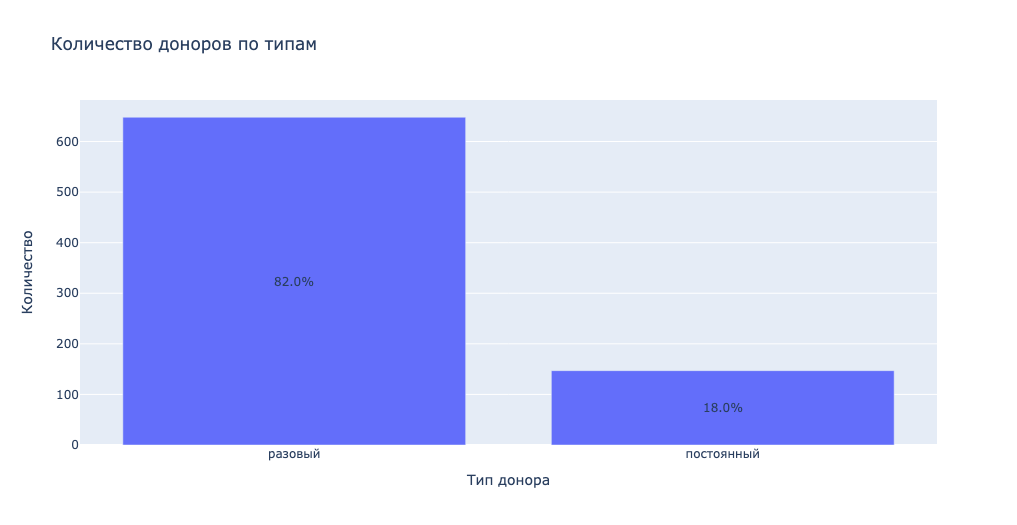

Среди доноров 648 доноров (82%) - разовые, а 147 (18%) - постоянные.

#### Графики распределения дат платежей.

Посмотрим на графики распределения дат платежей.

In [ ]:
fig = px.histogram(donors,
                   x="first_donation_date",
                   title='Распределение дат первого платежа в датасете `donors`',
                   nbins=13) # укажем количество корзин по количеству месяцев
fig.update_layout(
    xaxis_title='Дата первого платежа',
    yaxis_title='Частота'
)

fig.show()

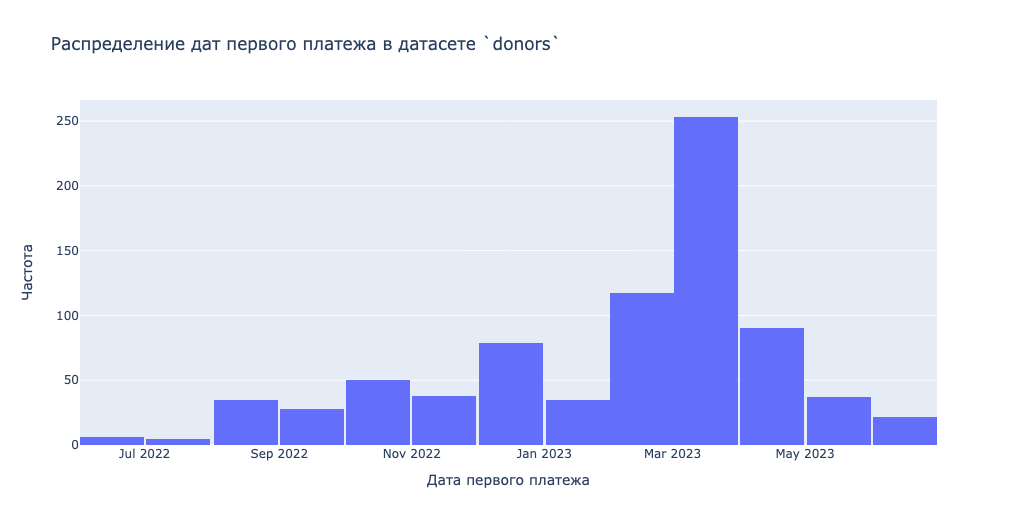

На распределении дат первого платежа датасета `donors` видим, что больше всего пожертвований пришлось на март 2023 года (253).

In [ ]:
fig = px.histogram(donors, x="last_donation_date",
                   title='Распределение дат последнего платежа в датасете `donors`',
                   nbins=11) # укажем количество корзин по количеству месяцев
fig.update_layout(
    xaxis_title='Даты последнего платежа',
    yaxis_title='Частота'
)
fig.show()

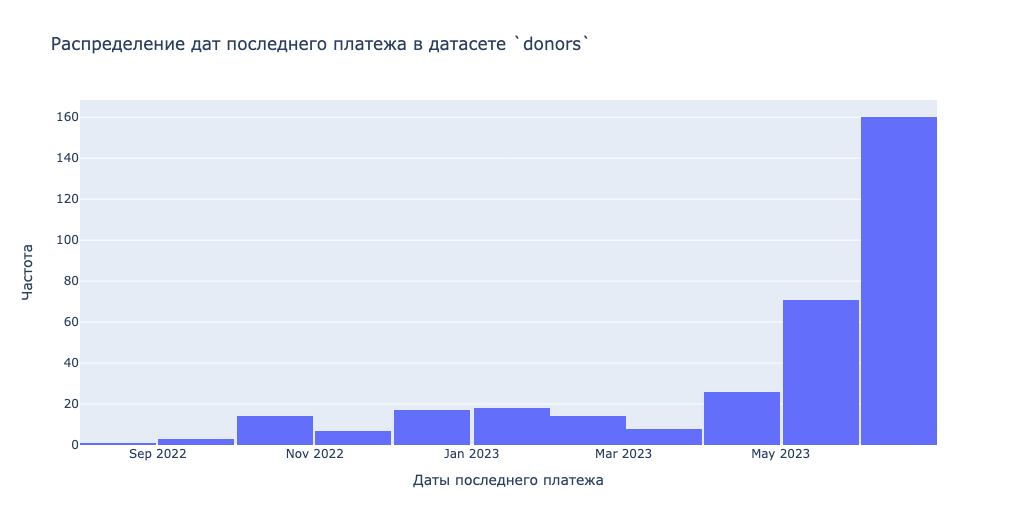

Видим всплекс пожертвований среди повторных платежей датасета `donors` в июне (160) 2023 года, возможно, это спустя 3 месяца повторно пожертвовали доноры, впервые пожертвовавшие в марте 2023 года.

#### Сумма первых пожертвований.

Посмотрим на сумму первых пожертвований.

In [ ]:
donors.first_donation_amount.describe()

count      795.000000
mean      1002.320755
std       3207.564962
min         10.000000
25%        300.000000
50%        450.000000
75%        900.000000
max      50000.000000
Name: first_donation_amount, dtype: float64

In [ ]:
donors.first_donation_amount.sum()

796845.0

Общая сумма первых пожертвований - 796 845 руб., количество пожертвований - 795, среднее арифметическое первого пожертвования датасета `donors` равно 1002,32 руб., медиана - 450 руб. Минимальное пожертвование 10 руб., максимальное - 50000 руб.

Различие медианы и арифметического среднего в 2,2 раза говорит о том, что в данных есть выбросы, в нашем случае - это очень крупные пожертвования (видим, что максимальное пожертвование 50000 руб.).

In [ ]:
fig = px.histogram(donors, x="first_donation_amount",
                   title='Распределение суммы первых пожертвований в датасете `donors`')
fig.update_layout(
    xaxis_title='Сумма первых пожертвований',
    yaxis_title='Частота'
)
fig.show()

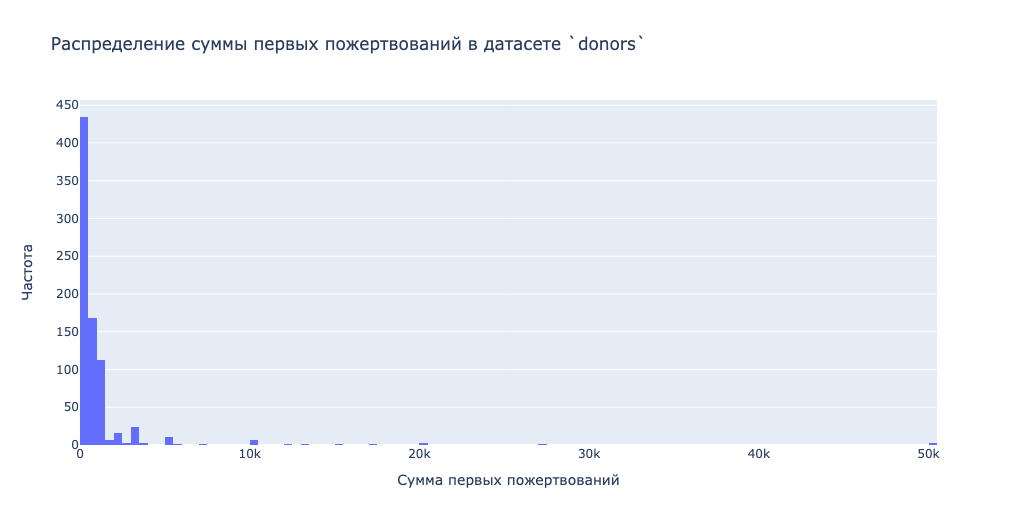

По распределению суммы первых пожертвований в датасете `donors` видим, что основная часть доноров жертвует до 1500 рублей. Также видим пожертвования в размере 10000, 20000, 28000 и 50000 рублей.

In [ ]:
donors.first_donation_amount.value_counts().head()

300.0     197
500.0     149
1000.0    109
100.0      61
50.0       48
Name: first_donation_amount, dtype: int64

В топ-5 входят суммы первых пожертвований:
1. 300 руб. (197 чел.),
2. 500 руб. (149 чел.),
3. 1000 руб. (109 чел.),
4. 100 руб. (61 чел.),
5. 50 руб. (48 чел.).

Первые три места можно использовать для "рекомендованных сумм" пожертвования на сайте.

#### Сумма последних пожертвований.

Посмотрим на сумму последних пожертвований.

In [ ]:
donors.last_donation_amount.describe()

count      339.000000
mean       934.339233
std       3383.289964
min         10.000000
25%        200.000000
50%        300.000000
75%        500.000000
max      50000.000000
Name: last_donation_amount, dtype: float64

In [ ]:
donors.last_donation_amount.sum()

316741.0

Общая сумма последних пожертвований - 316 741 руб. (в 2,5 раза меньше первичного пожертвования), количество пожертвований - 339 (в 2,3 раза меньше последнего пожертвования), среднее арифметическое последнего пожертвования датасета `donors` равно 934,34 руб., медиана - 300 руб. Минимальное пожертвование 10 руб., максимальное - 50000 руб. При сравнимом арифметическом среднем медиана в 1,5 раза ниже, при том, что количество пожертвований в 2,5 раза меньше.

In [ ]:
fig = px.histogram(donors, x="last_donation_amount",
                   title='Распределение суммы последних пожертвований в датасете `donors`')
fig.update_layout(
    xaxis_title='Сумма последних пожертвований',
    yaxis_title='Частота'
)
fig.show()

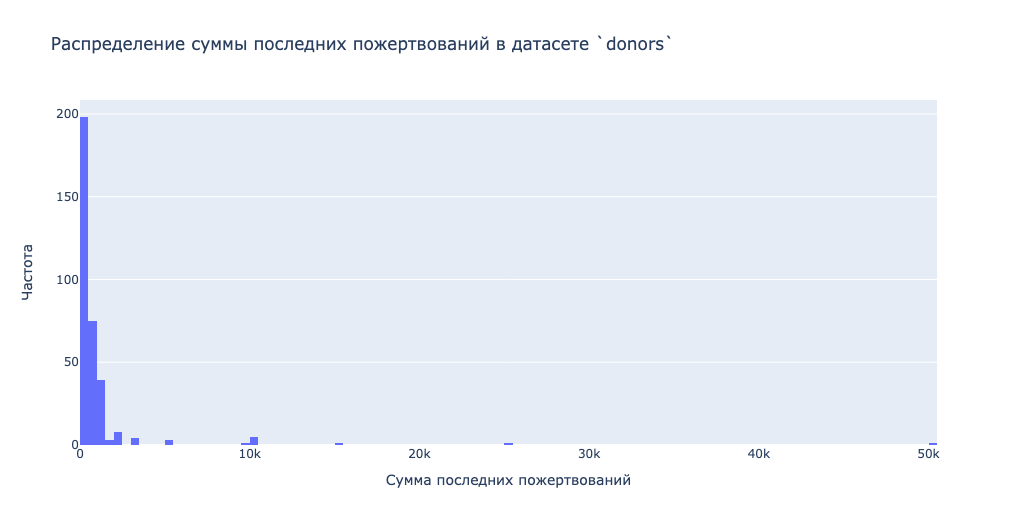

По распределению суммы последних пожертвований в датасете `donors` видим, что основная часть доноров жертвует до 1500 рублей. Также видим пожертвования в размере 10000, 25000 и 50000 рублей.

In [ ]:
donors.last_donation_amount.value_counts().head()

300.0     92
500.0     72
1000.0    38
100.0     34
50.0      24
Name: last_donation_amount, dtype: int64

В топ-5 входят суммы последних пожертвований:
1. 300 руб. (92 чел.),
2. 500 руб. (72 чел.),
3. 1000 руб. (38 чел.),
4. 100 руб. (34 чел.),
5. 50 руб. (24 чел.).  

Можно сделать вывод, что в основном люди повторно жертвуют такие же суммы, как и в первый раз. Возможно, речь идет о подписке на пожертвование.

#### Общая сумма пожертвований.

Посмотрим на общую сумму пожертвований.

In [ ]:
donors.donation_sum.describe()

count      795.000000
mean      1770.821384
std       4784.656469
min         10.000000
25%        300.000000
50%        600.000000
75%       1230.000000
max      55000.000000
Name: donation_sum, dtype: float64

In [ ]:
donors.donation_sum.sum()

1407803

Общая сумма пожертвований - 1 407 803 руб. (в 1,3 раза больше суммы первичных и последних пожертвований). Это говорит о том, что 294 тысячи руб. пожертвований не учтены в датасете `donors` (21% платежей).

Среднее арифметическое общих пожертвований датасета `donors` равно 1770,82 руб., медиана - 600 руб. Минимальное пожертвование 10 руб., максимальное - 55000 руб.

In [ ]:
fig = px.histogram(donors, x="donation_sum",
                   title='Распределение суммы общих пожертвований в датасете `donors`')
fig.update_layout(
    xaxis_title='Сумма общих пожертвований',
    yaxis_title='Частота'
)
fig.show()

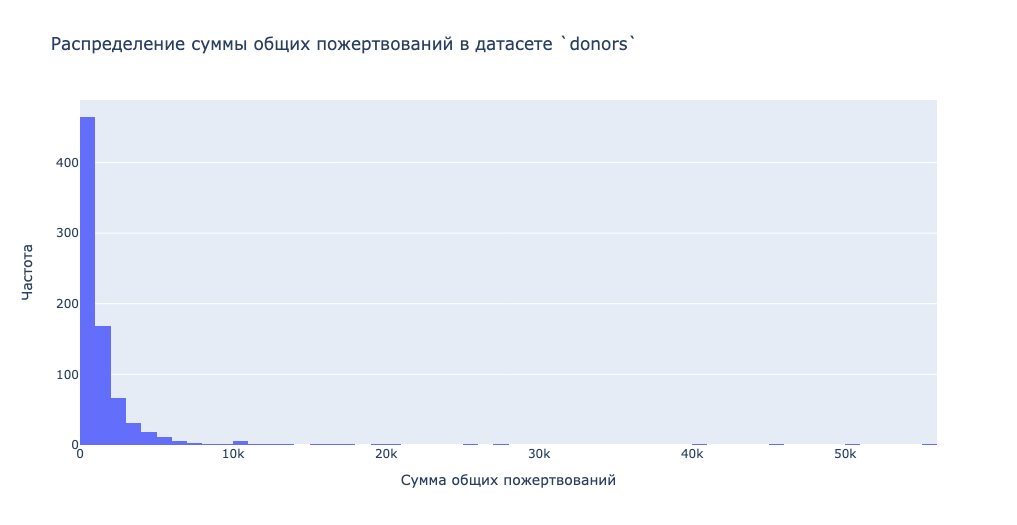

По распределению суммы последних пожертвований в датасете `donors` видим, что основная часть доноров жертвует до 5900 рублей.

In [ ]:
donors.donation_sum.value_counts().head()

300     107
1000     89
500      88
2000     49
1200     40
Name: donation_sum, dtype: int64

В топ-5 входят суммы общих пожертвований:
1. 300 руб. (107 чел.),
2. 1000 руб. (89 чел.),
3. 500 руб. (88 чел.),
4. 2000 руб. (49 чел.),
5. 1200 руб. (40 чел.).  

Неизменным с первыми и последними пожертвованиями осталось только 1 место - пожертвование в размере 300 руб. Отсюда можно сделать предположения, что большинство жертвует только один раз либо сайт недавно начал активную рекламу и мы имеем большое количество новых доноров, сделавших только один платеж.

#### Кампании пожертвований.

Посмотрим какие есть кампании первого пожертования.

In [ ]:
donors.first_donation_campaign.value_counts()

На уставную деятельность и содержание организации    792
#Больничкабежит                                        3
Name: first_donation_campaign, dtype: int64

Кампании пожертвований в датасете `donors`:  
- На уставную деятельность и содержание организации - 792 пожертвования.  
- #Больничкабежит - 3 пожертвования.

Видимо, это какие-то разовые акции в поддержку беговых движений.

In [ ]:
donors.query('first_donation_campaign == "#Больничкабежит"')

,donor_id,donor_type,first_donation_date,first_donation_amount,first_donation_campaign,campaign,payment_operator,last_donation_date,last_donation_amount,last_donation_campaign,donation_sum,code
385,444,разовый,2023-02-21 07:45:00,100.0,#Больничкабежит,#Больничкабежит,MIXPLAT,2023-06-21 07:45:00,100.0,#Больничкабежит,500,2670
556,268,разовый,2022-11-29 22:04:00,50.0,#Больничкабежит,#Больничкабежит,MIXPLAT,NaT,NaN,NaN,50,1180
630,194,разовый,2022-10-24 16:19:00,300.0,#Больничкабежит,#Больничкабежит,MIXPLAT,NaT,NaN,NaN,300,1621


Посмотрим какие есть кампании последнего пожертования.

In [ ]:
donors.last_donation_campaign.value_counts()

На уставную деятельность и содержание организации    338
#Больничкабежит                                        1
Name: last_donation_campaign, dtype: int64

На уставную деятельность и содержание организации сделано 338 пожертвований, на #Больничкабежит - 1 пожертвование.

In [ ]:
donors.campaign.value_counts()

На уставную деятельность и содержание организации                     791
#Больничкабежит                                                         3
#Больничкабежит, На уставную деятельность и содержание организации      1
Name: campaign, dtype: int64

Похоже, что между первым и последним пожертвованиями было пожертвование на #Больничкабежит.


#### Платежные операторы.

Посмотрим какие есть платежные операторы.

In [ ]:
donors.payment_operator.value_counts()

MIXPLAT                        765
MIXPLAT, Сбербанк Эквайринг     16
MIXPLAT, Квитанции               8
Сбербанк Эквайринг               6
Name: payment_operator, dtype: int64

Большая часть пожертвований 765 (96%) проходит через платежного оператора MIXPLAT. Разбиение на другие типы некорректно в связи с дублированием способов оплаты, кроме 6 (0,8%) пожертвований через Сбербанк Эквайринг.

#### Промежуточный вывод.

Провели исследование доноров в датасете `donors`:  
- Даты первых пожертвований датасета `donors`: с 15 июня 2022 года по 21 июня 2023 года.  
- Даты последних пожертвований датасета `donors`: с 30 августа 2022 года по 24 июня 2023 года.  
- Количество уникальных доноров в датасете `donors`: 795 человека.  
- Среди доноров 648 доноров (82%) - разовые, а 147 (18%) - постоянные.
- На распределении дат первого платежа датасета `donors` больше всего пожертвований пришлось на март 2023 года (253). Всплекс пожертвований среди повторных платежей датасета `donors` был в июне (160) 2023 года, возможно, это спустя 3 месяца повторно пожертвовали доноры, впервые пожертвовавшие в марте 2023 года.
- Общая сумма первых пожертвований датасета `donors` - 796 845 руб., количество пожертвований - 795, среднее арифметическое - 1002,32 руб., медиана - 450 руб. Минимальное пожертвование - 10 руб., максимальное - 50000 руб. Различие медианы и арифметического среднего в 2,2 раза говорит о том, что в данных есть выбросы, в нашем случае - это очень крупные пожертвования (видим, что максимальное пожертвование 50000 руб.).
- В топ-5 входят суммы первых пожертвований датасета `donors`:
  1. 300 руб. (197 чел.),
  2. 500 руб. (149 чел.),
  3. 1000 руб. (109 чел.),
  4. 100 руб. (61 чел.),
  5. 50 руб. (48 чел.).  
  Первые три места можно использовать для "рекомендованных сумм" пожертвования на сайте.
- Общая сумма последних пожертвований датасета `donors` - 316 741 руб. (в 2,5 раза меньше первичного пожертвования), количество пожертвований - 339 (в 2,3 раза меньше последнего пожертвования), среднее арифметическое - 934,34 руб., медиана - 300 руб. Минимальное пожертвование - 10 руб., максимальное - 50000 руб. При сравнимом арифметическом среднем медиана в 1,5 раза ниже, при том, что количество пожертвований в 2,5 раза меньше.
- В топ-5 входят суммы последних пожертвований датасета `donors`:
  1. 300 руб. (92 чел.),
  2. 500 руб. (72 чел.),
  3. 1000 руб. (38 чел.),
  4. 100 руб. (34 чел.),
  5. 50 руб. (24 чел.).  
  Можно сделать вывод, что в основном люди повторно жертвуют такие же суммы, как и в первый раз. Возможно, речь идет о подписке на пожертвование.
- Общая сумма пожертвований датасета `donors` - 1 407 803 руб. (в 1,3 раза больше суммы первичных и последних пожертвований). Это говорит о том, что 294 тысячи руб. пожертвований не учтены в датасете `donors` (21% платежей). Среднее арифметическое - 1770,82 руб., медиана - 600 руб. Минимальное пожертвование - 10 руб., максимальное - 55000 руб.
- В топ-5 входят общие суммы пожертвований датасета `donors`:
  1. 300 руб. (107 чел.),
  2. 1000 руб. (89 чел.),
  3. 500 руб. (88 чел.),
  4. 2000 руб. (49 чел.),
  5. 1200 руб. (40 чел.).  
  Неизменным с первыми и последними пожертвованиями осталось только 1 место - пожертвование в размере 300 руб. Отсюда можно сделать предположения, что большинство жертвует только один раз либо сайт недавно начал активную рекламу и мы имеем большое количество новых доноров, сделавших только один платеж.  
- Кампании пожертвований в датасете `donors`:  
  - На уставную деятельность и содержание организации - 792 пожертвования.  
  - #Больничкабежит - 3 пожертвования.  
Видимо, это какие-то разовые акции в поддержку беговых движений.
- 765 пожертвований (96%) проходит через платежного оператора MIXPLAT. Разбиение на другие типы некорректно в связи с дублированием способов оплаты, кроме 6 пожертвований (0,8%) через Сбербанк Эквайринг.

### Датасет `clients`.

#### Даты первого пожертвования.

Посмотрим на даты первого пожертвования.

In [ ]:
print(f'Минимальная дата первого пожертвования датасета `clients`: {clients.first_donation_date.min()}.')
print(f'Максимальная дата первого пожертвования датасета `clients`: {clients.first_donation_date.max()}.')

Минимальная дата первого пожертвования датасета `clients`: 2021-11-17 14:39:43.
Максимальная дата первого пожертвования датасета `clients`: 2023-06-01 09:50:18.


Даты первых пожертвований датасета `clients`: с 17 ноября 2021 года по 01 июня 2023 года.  

#### Даты последнего пожертвования.

Посмотрим на даты последнего пожертвования.

In [ ]:
print(f'Минимальная дата последнего пожертвования датасета `clients`: {clients.last_donation_date.min()}.')
print(f'Максимальная дата последнего пожертвования датасета `clients`: {clients.last_donation_date.max()}.')

Минимальная дата последнего пожертвования датасета `clients`: 2021-11-18 11:40:04.
Максимальная дата последнего пожертвования датасета `clients`: 2023-06-02 03:11:53.


Даты последних пожертвований датасета `clients`: с 18 ноября 2021 года по 02 июня 2023 года.  

#### Количество уникальных доноров.

Посмотрим на количество уникальных доноров.

In [ ]:
print(f'Количество уникальных доноров в датасете `clients`: {clients.code.nunique()} чел.')

Количество уникальных доноров в датасете `clients`: 954 чел.


Количество уникальных доноров в датасете `clients`: 954 человека.

#### Графики распределения дат платежей.

Посмотрим на графики распределения дат платежей.

In [ ]:
fig = px.histogram(clients,
                   x="first_donation_date",
                   title='Распределение дат первого платежа в датасете `clients`',
                   nbins=20) # укажем количество корзин по количеству месяцев
fig.update_layout(
    xaxis_title='Даты первого платежа',
    yaxis_title='Частота'
)
fig.show()

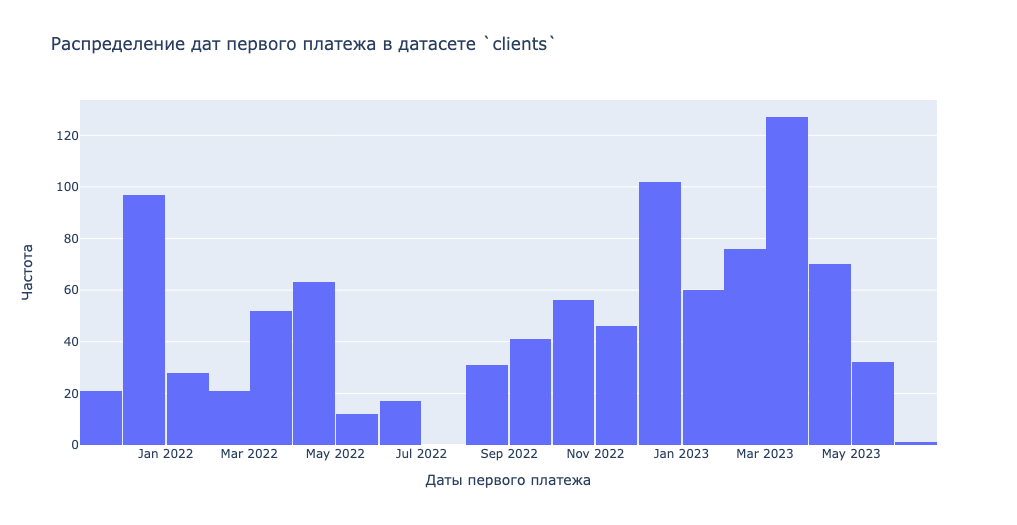

Видим на распределении дат первого платежа датасета `clients` отсутствие пожертвований в июле 2022 года (возможно технические проблемы с системой) и только одно пожертвование в июне, но это объясняется тем, что данные `clients` до 1 июня 2023 года.

Видим всплески в декабре 2021 года (97), марте (52), апреле (63) 2022 года. После резкого снижения в мае (12) видим постепенный рост с пиками в декабре 2022 года (102) и марте 2023 года (127).

In [ ]:
fig = px.histogram(clients,
                   x="last_donation_date",
                   title='Распределение дат последнего платежа в датасете `clients`',
                   nbins=20) # укажем количество корзин по количеству месяцев
fig.update_layout(
    xaxis_title='Даты последнего платежа',
    yaxis_title='Частота'
)
fig.show()

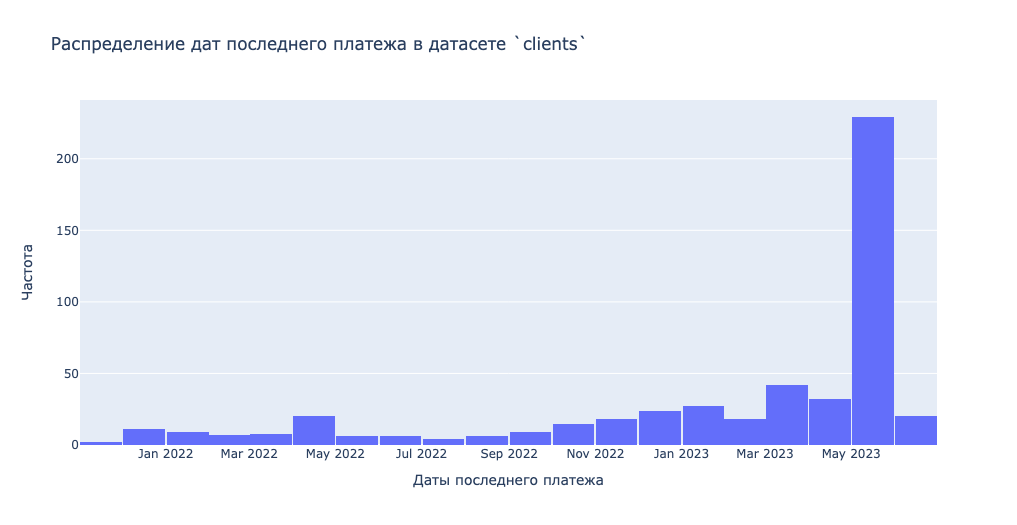

Видим всплекс пожертвований среди повторных платежей датасета `clients` в мае 2023 года (229), в остальные месяцы количество пожертвований было 42 и менее. Такой всплеск повторных платежей выглядит аномальным, возможно, именно в мае была проведена рекламная кампании среди уже сделавших пожертвование людей или это было офлайн-мероприятие.

#### Общая сумма пожертвований.


Посмотрим на общую сумму пожертвований.

In [ ]:
clients.payments_sum.describe()

count      954.000000
mean      2093.008386
std       5479.589642
min         10.000000
25%        300.000000
50%        665.500000
75%       1800.000000
max      90000.000000
Name: payments_sum, dtype: float64

In [ ]:
clients.payments_sum.sum()

1996730

Общая сумма пожертвований - 1 996 730 руб., количество пожертвований - 954, среднее арифметическое первого пожертвования датасета `clients` равно 2093,01 руб., медиана - 665 руб. Минимальное пожертвование 10 руб., максимальное - 90000 руб.

In [ ]:
fig = px.histogram(clients, x="payments_sum",
                   title='Распределение общей суммы пожертвований в датасете `clients`')
fig.update_layout(
    xaxis_title='Общая сумма пожертвования',
    yaxis_title='Частота'
)
fig.show()

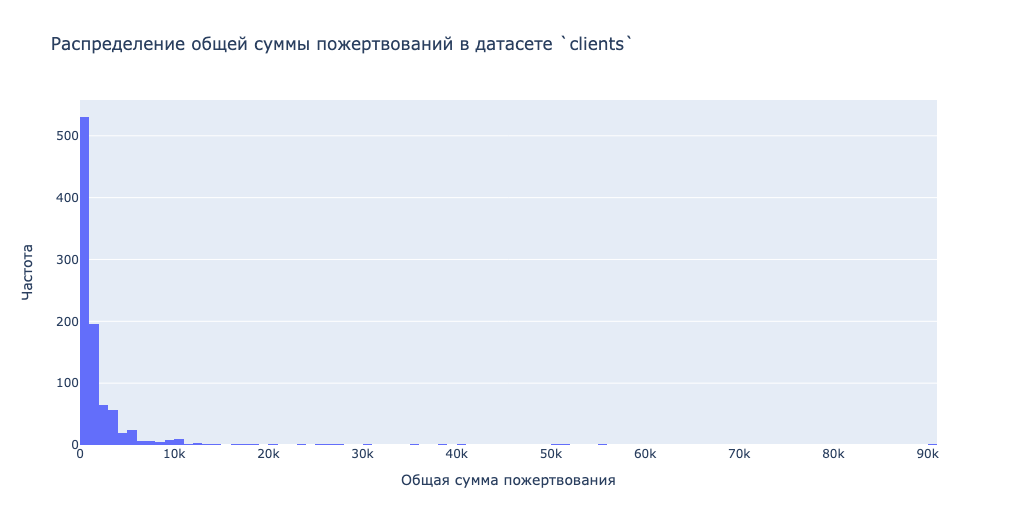

По распределению общей суммы пожертвования в датасете `clients` видим, что основная часть доноров жертвует до 3990 рублей.

In [ ]:
clients.payments_sum.value_counts().head()

500     150
300     118
1000    104
3000     41
1500     38
Name: payments_sum, dtype: int64

В топ-5 входят суммы пожертвований:
1. 500 руб. (150 чел.),
2. 300 руб. (118 чел.),
3. 1000 руб. (104 чел.),
4. 3000 руб. (41 чел.),
5. 1500 руб. (38 чел.).

В сравнении с датасетом `donors` при большем количестве доноров в 1,2 раза общая сумма пожертвований в датасете `clients` больше в 1,4 раза. Можно сделать вывод, что доноры из датасета `clients` жертвуют больше доноров из датасета `donors`.

#### Типы платежей.


Рассмотрим типы платежей в датасете `clients`.

In [ ]:
clients.payment_type.value_counts()

карта                 670
терм,СБП              186
карта,терм,СБП         58
sms,карта              11
sms,карта,терм,СБП      3
sms,терм,СБП            2
sms                     1
Name: payment_type, dtype: int64

Большая часть платежей проходит по карте 670 (72%). Разбиение на другие типы некорректно в связи с дублированием способов оплаты, кроме единственной оплаты (0,1%) по sms.

#### Количество платежей на донора.

Рассмотрим количество платежей на донора.

In [ ]:
clients.payments_count.describe()

count    954.000000
mean       2.720126
std        3.275761
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       24.000000
Name: payments_count, dtype: float64

Среднее арифметическое количество платежей на донора составляет 2,7 платежа, медиана - 1 платеж, минимальное количество - 1 платеж, максимальное количество - 24 платежа.

#### Страны и регионы, из которых осуществлялись пожертвования.


Рассмотрим из каких стран осуществлялись пожертвования.

In [ ]:
clients.country.value_counts().head()

Россия         701
Россия\nСША     46
Германия        16
Нидерланды      14
Швеция          12
Name: country, dtype: int64

Топ-5 стран по количеству пожертвований:
1. Россия - 701 платежа (73%).
2. Россия/США - 46 (5%).
3. Германия - 16 (1,7%).
4. Нидерланды - 14 (1,5%).
5. Швеция - 12 (1,3%).

При этом Россия может фигугрировать в сочетании с другими странами (возможно, это путешествующие доноры либо, что вероятнее, доноры забывали отключить VPN при оплате). Посчитаем общее количество упоминаний России в пожертвованиях.

In [ ]:
clients.country.str.contains('Россия').sum()

770

Россия упоминается в 770 пожертвовании (81%).

In [ ]:
clients.region.value_counts().head()

Санкт-Петербург       182
Ленинградская обл.     78
Кунене                 77
Cuando Cubango         53
Московская обл.        41
Name: region, dtype: int64

Топ-5 регионов по количеству пожертвований:
1. Санкт-Петербург - 182 платежа (19%).
2. Ленинградская обл. - 78 (8%).
3. Кунене - 77 (8%).
4. Cuando Cubango - 53 (5,5%).
5. Московская обл. - 41 (4%).

"Благотворительная клиника" находится в Санкт-Петербурге и поэтому не удивительно, что первые два места занимают Санкт-Петербург и Ленинградская область. Кунене и Cuando Cubango попали в топ-5, скорее всего, из-за невыключенного VPN, на 5 месте Московская область.

#### Промежуточный вывод.

Провели исследование доноров в датасете `clients`:  
- Даты первых пожертвований датасета `clients`: с 17 ноября 2021 года по 01 июня 2023 года.  
- Даты последних пожертвований датасета `clients`: с 18 ноября 2021 года по 02 июня 2023 года.  
- Количество уникальных доноров в датасете `clients`: 954 человек.
- На распределении дат первого платежа датасета `clients` отсутствуют пожертвования в июле 2022 года (возможно технические проблемы с системой). На графике имеются всплески в декабре 2021 года (97), марте (52), апреле (63) 2022 года. После резкого снижения в мае (12) видим постепенный рост с пиками в декабре 2022 года (102) и марте 2023 года (127). Похоже на сезонный фактор.
- Всплекс пожертвований среди повторных платежей датасета `clients` в мае 2023 года (229) выглядит аномальным, в остальные месяцы количество пожертвований было 42 и менее. Возможно, именно в мае была проведена рекламная кампании среди уже сделавших пожертвование людей или это было офлайн-мероприятие.
- Общая сумма пожертвований - 1 996 730 руб., количество пожертвований - 954, среднее арифметическое первого пожертвования датасета `clients` равно 2093,01 руб., медиана - 665 руб. Минимальное пожертвование 10 руб., максимальное - 90000 руб.
- В топ-5 входят суммы пожертвований датасета `clients`:
  1. 500 руб. (150 чел.),
  2. 300 руб. (118 чел.),
  3. 1000 руб. (104 чел.),
  4. 3000 руб. (41 чел.),
  5. 1500 руб. (38 чел.).  
  В сравнении с датасетом `donors` при большем количестве доноров в 1,2 раза общая сумма пожертвований в датасете `clients` больше в 1,4 раза. Можно сделать вывод, что доноры из датасета `clients` жертвуют больше доноров из датасета `donors`.
- 670 платежей (72%) проходит по карте. Разбиение на другие типы некорректно в связи с дублированием способов оплаты, кроме единственной оплаты (0,1%) по sms.
- Среднее арифметическое количество платежей на донора составляет 2,7 платежа, медиана - 1 платеж, минимальное количество - 1 платеж, максимальное количество - 24 платежа.
- Топ-5 стран по количеству пожертвований:
  1. Россия - 701 платежа (73%).
  2. Россия/США - 46 (5%).
  3. Германия - 16 (1,7%).
  4. Нидерланды - 14 (1,5%).
  5. Швеция - 12 (1,3%).  
При этом Россия может фигугрировать в сочетании с другими странами (возможно, это путешествующие доноры либо, что вероятнее, доноры забывали отключить VPN при оплате). Россия упоминается в 770 пожертвовании (81%).
- Топ-5 регионов по количеству пожертвований:
  1. Санкт-Петербург - 182 платежа (19%).
  2. Ленинградская обл. - 78 (8%).
  3. Кунене - 77 (8%).
  4. Cuando Cubango - 53 (5,5%).
  5. Московская обл. - 41 (4%).
"Благотворительная клиника" находится в Санкт-Петербурге и поэтому не удивительно, что первые два места занимают Санкт-Петербург и Ленинградская область. Кунене и Cuando Cubango попали в топ-5, скорее всего, из-за невыключенного VPN, на 5 месте Московская область.

### Датасет `adgrants`.

#### Даты проведения рекламных кампаний.

Рассмотрим даты проведения рекламных кампаний.

In [ ]:
print(f'Минимальная дата в датасете `adgrants`: {adgrants.date.min()}.')
print(f'Максимальная дата в датасете `adgrants`: {adgrants.date.max()}.')

Минимальная дата в датасете `adgrants`: 2023-01-15 00:00:00.
Максимальная дата в датасете `adgrants`: 2023-07-19 00:00:00.


Даты проведения рекламных кампаний: с 14 января 2023 года по 19 июля 2023 года.


#### Рекламные кампании.

Посмотрим на рекламные кампании в датасете `adgrants`.

In [ ]:
adgrants.campaign.nunique()

24

In [ ]:
adgrants.groupby('campaign')['date'].agg(['min', 'max']).reset_index().sort_values(by='min')

,campaign,min,max
8,Команда#2 / Бот / СПб,2023-01-15,2023-02-21
11,Пакет_Бездомашний очаг_Психологическая помощь_...,2023-03-14,2023-06-05
1,helpingwomen/feminism_keys,2023-03-14,2023-03-23
21,Реабилитационные центры_РСЯ_№5 от 05-03-2023,2023-03-14,2023-03-21
13,Питер - Автотаргетинг,2023-03-14,2023-03-28
5,Верущие Автотаргетинг (Бездомные женщины),2023-03-14,2023-03-28
6,Гео,2023-03-14,2023-04-12
12,Пакет_Бездомашний очаг_Реабилитационные центры...,2023-03-14,2023-06-19
22,Ремонт больнички - Автотаргетинг,2023-03-14,2023-03-28
10,Пакет_Бездомашний очаг_Верующие_ключи-интересы,2023-03-14,2023-06-20


В датасете `adgrants` находится информация о 24 рекламных кампаниях:
- 11 рекламных кампаний проходили с января по октябрь 2023 года.
- 1 рекламная кампания - с марта по октябрь 2023 года.
- 1 рекламная кампания - с мая по октябрь 2023 года.
- 11 рекламных кампаний - в марте 2023 года.

В датасете `adgrants` нет привязки к пожертвованиям и мы можем только предположить какая рекламная кампания дала приток пожертвований в связи с большим пересечением дат проведения рекламных кампаний.

#### Условия показа рекламы.

In [ ]:
adgrants.condition.value_counts()

'---autotargeting                  26004
благотворительный фонд              2769
помощь бездомным                    2273
фонд помощи                         2238
пожертвование                       2127
                                   ...  
духовная культура                      2
почетный донор спб                     1
асана йога                             1
донор санкт петербург -почетный        1
йога спб                               1
Name: condition, Length: 1196, dtype: int64

Всего 1196 условий показа рекламы.

Топ-5 условий показа рекламы:
1. '---autotargeting - 24674.
2. благотворительный фонд - 2635.
3. помощь бездомным - 2181.
4. фонд помощи - 2109.
5. пожертвование - 2038.

#### Пол участников рекламных кампаний.

Рассмотрим разделение по половому признаку участников рекламных кампаний.

In [ ]:
gender = adgrants['gender'].value_counts().reset_index()
gender.columns = ['gender', 'count']
gender

,gender,count
0,женский,144218
1,мужской,138191
2,не определен,25579


In [ ]:
values = [gender['count'][0], gender['count'][1], gender['count'][2]]
labels = ['Женский', 'Мужской', 'Не определен']
fig = go.Figure()
fig.add_trace(go.Pie(values=values, labels=labels))
fig.update_layout(title='Соотношение людей по полу', title_x=0.50)
fig.show()

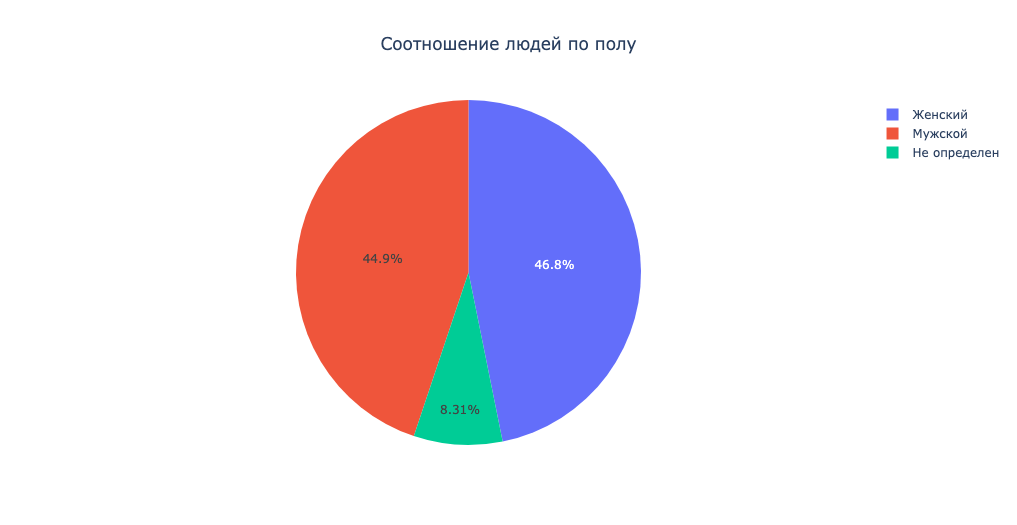

В рекламных кампаниях приняло участие 46,9% женщин и 44,9% мужчин, 8,3% участников не указали свой пол.

#### Уровень платежеспособности участников рекламных кампаний.

Рассмотрим уровень платежеспособности участников рекламных кампаний.

In [ ]:
adgrants['solvency_level'].value_counts()

Остальные    151816
6-10%         70491
2-5%          67240
1%            18441
Name: solvency_level, dtype: int64

Среди участников рекламных кампаний преобладает уровень платежеспособности "Остальные" (151825), скорее всего речь идет об отсутствии показателя. На втором месте 6-10% (70492), на третьем - 2-5% (67240), на четвертом - 1% (18441).

#### Возраст участников рекламных кампаний.

Рассмотрим возраст участников рекламных кампаний.

In [ ]:
adgrants['age'].value_counts()

25-34           59446
35-44           58003
старше 55       54042
45-54           49468
18-24           44262
не определен    26543
младше 18       16224
Name: age, dtype: int64

Возраст участников рекламных кампаний:
1. 25-34 (59447).
2. 35-44 (58008).
3. старше 55 (54045).
4. 45-54 (49469).
5. 18-24 (44262).
6. не определен (26543).
7. младше 18 (16224).

Больше всего участников рекламный кампаний в возрастной группе 25-34 (59447). На втором месте - 35-44 (58008), на третьем месте - старше 55 (54045).

#### Промежуточный вывод.

Провели исследование доноров в датасете `adgrants`:  
- Даты проведения рекламных кампаний датасета `adgrants`: с 14 января 2023 года по 19 июля 2023 года.
- В датасете `adgrants` находится информация о 24 рекламных кампаниях:
  - 11 рекламных кампаний проходили с января по октябрь 2023 года.
  - 1 рекламная кампания - с марта по октябрь 2023 года.
  - 1 рекламная кампания - с мая по октябрь 2023 года.
  - 11 рекламных кампаний - в марте 2023 года.  
В датасете `adgrants` нет привязки к пожертвованиям и мы можем только предположить какая рекламная кампания дала приток пожертвований в связи с большим пересечением дат проведения рекламных кампаний.
- Всего 1196 условий показа рекламы. Топ-5 условий показа:
  1. '---autotargeting - 24674.
  2. благотворительный фонд - 2635.
  3. помощь бездомным - 2181.
  4. фонд помощи - 2109.
  5. пожертвование - 2038.
- В рекламных кампаниях приняло участие 46,9% женщин и 44,9% мужчин, 8,3% участников не указали свой пол.
- Среди участников рекламных кампаний преобладает уровень платежеспособности "Остальные" (151825), скорее всего речь идет об отсутствии показателя. На втором месте 6-10% (70492), на третьем - 2-5% (67240), на четвертом - 1% (18441).
- Возраст участников рекламных кампаний:
  1. 25-34 (59447).
  2. 35-44 (58008).
  3. старше 55 (54045).
  4. 45-54 (49469).
  5. 18-24 (44262).
  6. не определен (26543).
  7. младше 18 (16224).  
Больше всего участников рекламный кампаний в возрастной группе 25-34 (59447). На втором месте - 35-44 (58008), на третьем месте - старше 55 (54045).

## 4.2. Расчет конверсии.

### Датасет `adgrants`.

#### Показы.

Посчитаем количество показов.

In [ ]:
adgrants.impressions.sum()

9852323

Всего было 9 853 538 показов рекламных кампаний.

#### Клики.

Посчитаем количество кликов.

In [ ]:
adgrants.clicks.sum()

41230

Всего было 41 243 совершено кликов.

#### CTR.

Посчитаем количество CTR.

In [ ]:
round(adgrants.ctr.mean(), 2)

0.45

CTR составил 0,45%.

Посчитаем количествой конверсий из кликов в целевое действие.

In [ ]:
adgrants.convertions.sum()

437.0

Было совершено 466 конверсий из кликов в целевой действие.

#### Конверсия из кликов в целевое действие.

Посчитаем конверсию из кликов в целевое действие.

In [ ]:
round(adgrants.query('convertions > 0').convertions.mean(), 2)

1.13

Посмотрим на конверсию из кликов в целевое действие в разрезе половой принадлежности.

In [ ]:
round(adgrants.query('convertions > 0').groupby('gender').convertions.mean(), 2).reset_index(name='conversion').sort_values(by='conversion', ascending=False)

,gender,conversion
2,не определен,1.25
0,женский,1.16
1,мужской,1.08


Коневерсия доноров, не указавших пол, составляет 1,25%, женский - 1,16%, мужской - 1,08%.

Посмотрим на конверсию из кликов в целевое действие в разрезе уровня платежеспособности.

In [ ]:
round(adgrants.query('convertions > 0').groupby('solvency_level').convertions.mean(), 2).reset_index(name='conversion').sort_values(by='conversion', ascending=False)

,solvency_level,conversion
3,Остальные,1.15
1,2-5%,1.12
0,1%,1.00
2,6-10%,1.00


Конверсия доноров, в категории "Остальные" - 1,15%, "2-5%" - 1,12%, "1%" и "6-10%" - 1%.

Посмотрим на конверсию из кликов в целевое действие в разрезе возраста.

In [ ]:
round(adgrants.query('convertions > 0').groupby('age').convertions.mean(), 2).reset_index(name='conversion').sort_values(by='conversion', ascending=False)

,age,conversion
6,старше 55,1.25
1,25-34,1.11
5,не определен,1.11
3,45-54,1.10
2,35-44,1.06
0,18-24,1.00
4,младше 18,1.00


На первом месте категория "старше 55" - 1,25%, на втором месте "25-34" - 1,11%, на третьем месте "45-54" - 1,10%.

Конверсия из кликов в целевое действие по данным датасета `adgrants` составила 1,13%.

При этом стоит усилить внимание рекламе для целевой аудитории:
- женщины,
- старше 55 лет,
- уровень платежеспособности 2-5%.

### Датасеты `donors` и `clients`.

Для расчета конверсии в связи с отсутствием привязки рекламных кампаний к пожертвованиям мы можем взять в расчет только общее количество пожертвований из датасетов `donors` и `clients`.

#### Общее количество пожертвований по дате.

Напишем функцию для группировки и подсчета общего количества пожертвований по дате с аргументами: `название датасета`, `название колонки` и `суффикс`. Добавляем суффикс к названиям колонок для исключения дублирования названий при последущем объединении датасетов.

Обратим внимание, что в связи с ограниченными данными мы берем в расчет только первое и последнее пожертвования донора. Информации о промежуточных пожертвованиях донора у нас нет.

В связи с отсутствием в датасете `clients` информации о размере первого и последнего пожертвования данные о размере пожертвований агрегировать не будем.

In [ ]:
def payments_count_by_date(dataset, date_column, s):
    dataset_copy = dataset.copy()
    dataset_copy[date_column] = pd.to_datetime(dataset_copy[date_column]).dt.date
    dataset_copy[date_column] = pd.to_datetime(dataset_copy[date_column], format='%Y-%m-%d')
    grouped_data = dataset_copy.groupby(date_column).size().reset_index(name='payments_count')
    grouped_data = grouped_data.add_suffix(s)
    return grouped_data.sort_values(by='payments_count' + s, ascending=False).reset_index(drop=True)

In [ ]:
# Сгруппируем и посчитаем общее количество первых пожертвований датасета `donors` по дате
donors_first_donation = payments_count_by_date(donors, 'first_donation_date', '_df')
donors_first_donation

,first_donation_date_df,payments_count_df
0,2023-03-28,27
1,2023-02-26,27
2,2023-03-29,23
3,2022-12-30,19
4,2023-03-01,19
...,...,...
230,2022-12-08,1
231,2022-12-12,1
232,2022-12-14,1
233,2022-12-15,1


In [ ]:
# Сгруппируем и посчитаем общее количество последних пожертвований датасета `donors` по дате
donors_last_donation = payments_count_by_date(donors, 'last_donation_date', '_dl')
donors_last_donation

,last_donation_date_dl,payments_count_dl
0,2023-05-26,15
1,2023-06-04,14
2,2023-06-02,12
3,2023-06-01,12
4,2023-06-06,12
...,...,...
117,2023-01-30,1
118,2023-01-29,1
119,2023-01-27,1
120,2023-01-18,1


In [ ]:
# Сгруппируем и посчитаем общее количество первых пожертвований датасета `clients` по дате
clients_first_donation = payments_count_by_date(clients, 'first_donation_date', '_cf')
clients_first_donation

,first_donation_date_cf,payments_count_cf
0,2021-12-23,50
1,2022-12-30,26
2,2023-03-28,23
3,2023-02-26,22
4,2022-12-29,19
...,...,...
317,2022-10-07,1
318,2022-10-10,1
319,2022-10-11,1
320,2022-10-12,1


In [ ]:
# Сгруппируем и посчитаем общее количество последних пожертвований датасета `clients` по дате
clients_last_donation = payments_count_by_date(clients, 'last_donation_date', '_cl')
clients_last_donation

,last_donation_date_cl,payments_count_cl
0,2023-06-01,19
1,2023-05-04,17
2,2023-05-26,17
3,2023-05-28,16
4,2023-05-12,11
...,...,...
188,2022-11-07,1
189,2022-11-09,1
190,2022-11-12,1
191,2022-11-16,1


#### Общее количество просмотров по дате.

In [ ]:
# Сгруппируем и посчитаем общее количество просмотров по дате
impressions = adgrants.groupby('date')['impressions'].sum().reset_index(name='impressions_count')
impressions = impressions.sort_values(by='impressions_count', ascending=False).reset_index(drop=True)
impressions

,date,impressions_count
0,2023-03-22,321197
1,2023-01-25,284367
2,2023-03-20,284194
3,2023-03-14,252134
4,2023-01-19,229233
...,...,...
146,2023-04-21,4198
147,2023-06-12,3435
148,2023-05-14,2153
149,2023-04-12,643


#### Общее количество кликов по дате.

In [ ]:
# Сгруппируем и посчитаем общее количество кликов по дате
clicks = adgrants.groupby('date')['clicks'].sum().reset_index(name='clicks_count')
clicks = clicks.sort_values(by='clicks_count', ascending=False).reset_index(drop=True)
clicks

,date,clicks_count
0,2023-03-22,1357
1,2023-03-25,1213
2,2023-03-14,1038
3,2023-03-20,1010
4,2023-03-24,920
...,...,...
146,2023-04-18,22
147,2023-04-21,15
148,2023-04-12,10
149,2023-05-14,10


#### Общее количество конверсий по дате.

In [ ]:
# Сгруппируем и посчитаем общее количество конверсий по дате
convertions = adgrants.groupby('date')['convertions'].sum().reset_index(name='convertions_count')
convertions = convertions.sort_values(by='convertions_count', ascending=False).reset_index(drop=True)
convertions

,date,convertions_count
0,2023-06-26,68.0
1,2023-06-25,47.0
2,2023-05-02,15.0
3,2023-04-18,13.0
4,2023-04-09,10.0
...,...,...
146,2023-02-16,0.0
147,2023-02-15,0.0
148,2023-02-14,0.0
149,2023-02-12,0.0


#### Конверсия из кликов в пожертвование.

Рассчитаем конверсию из кликов в пожертвование.

В связи с тем, что в датасете `adgrants` предоставлена информация по рекламным кампаниям с 14.01.2023 по 19.07.2023 мы теряем значительную информацию по платежам из датасетов `clients` (с 17.11.2021 по 13.01.2023) и `donors` (с 15.06.2022 по 13.01.2023).

In [ ]:
# Объединим данные о показах и кликах по дате
donors_ad = pd.merge(impressions, clicks, left_on='date', right_on='date', how='left')

# Посчитаем CTR
donors_ad['ctr'] = round(donors_ad['clicks_count'] / donors_ad['impressions_count'] * 100, 2)

# Объединим с данными о количествах конверсий по дате
donors_ad = pd.merge(donors_ad, convertions, left_on='date', right_on='date', how='left')

# Посчитаем конверсию
donors_ad['conversion_adgrants'] = round(donors_ad['convertions_count'] / donors_ad['clicks_count'] * 100, 2)

# Объединим с данными о количествах пожертвований по дате
donors_ad = pd.merge(donors_ad, donors_first_donation, left_on='date', right_on='first_donation_date_df', how='left')
donors_ad = pd.merge(donors_ad, donors_last_donation, left_on='date', right_on='last_donation_date_dl', how='left')
donors_ad = pd.merge(donors_ad, clients_first_donation, left_on='date', right_on='first_donation_date_cf', how='left')
donors_ad = pd.merge(donors_ad, clients_last_donation, left_on='date', right_on='last_donation_date_cl', how='left')

# Удалим пустые значения и дублирующие столбцы с датой
donors_ad = donors_ad.dropna()
donors_ad = donors_ad.drop(['first_donation_date_df', 'last_donation_date_dl', 'first_donation_date_cf', 'last_donation_date_cl'], axis=1)

# Добавим столбец `payments_count` с общей суммой пожертвований и удалим дублирующие столбцы
donors_ad['payments_count'] = donors_ad['payments_count_df'] + donors_ad['payments_count_dl'] + donors_ad['payments_count_cf'] + donors_ad['payments_count_cl']
donors_ad = donors_ad.drop(['payments_count_df', 'payments_count_dl', 'payments_count_cf', 'payments_count_cl'], axis=1)

# Посчитаем конверсию
donors_ad['conversion_payments'] = round(donors_ad['payments_count'] / donors_ad['clicks_count'] * 100, 2)

In [ ]:
donors_ad.sort_values(by='conversion_payments', ascending=False).reset_index(drop=True)

,date,impressions_count,clicks_count,ctr,convertions_count,conversion_adgrants,payments_count,conversion_payments
0,2023-04-12,643,10,1.56,1.0,10.00,12.0,120.00
1,2023-04-05,7221,32,0.44,0.0,0.00,26.0,81.25
2,2023-05-14,2153,10,0.46,0.0,0.00,7.0,70.00
3,2023-05-28,23034,73,0.32,3.0,4.11,29.0,39.73
4,2023-05-12,29832,80,0.27,9.0,11.25,19.0,23.75
5,2023-04-26,10051,52,0.52,2.0,3.85,11.0,21.15
6,2023-06-01,72497,170,0.23,4.0,2.35,33.0,19.41
7,2023-05-27,24051,78,0.32,1.0,1.28,12.0,15.38
8,2023-05-20,31026,79,0.25,4.0,5.06,11.0,13.92
9,2023-05-21,30074,116,0.39,2.0,1.72,16.0,13.79


Получили 33 даты, в которых совпали рекламные кампании и пожертвования в датасетах `clients` и `donors`.

В датасете `adgrants` конверсия кликов в целевое действие составила 1,13%. У нас имеется конверсия 120%, что невозможно по определению. В этом случае можно сделать вывод, что на пожертвования повлияли другие факторы, которые никак не связаны с рекламными кампаниями в Яндекс метрике.

Мы можем сравнить конверсию, расчитанную по рекламным кампаниям, `conversion_adgrants` и конверсию, рассчитанную на основе платежей `conversion_payments`. Если они будут примерно одинаковыми, то мы можем предположить, что пожертвование в эту дату прошло с помощью рекламной кампании в Яндекс метрике.

Определим даты, для которых значения `conversion_adgrants` и `conversion_payments` одинаковы с разбросом в 20%.

In [ ]:
donors_ad[(donors_ad['conversion_adgrants'] >= 0.8 * donors_ad['conversion_payments']) & \
 (donors_ad['conversion_adgrants'] <= 1.2 * donors_ad['conversion_payments'])]['date'].tolist()

[Timestamp('2023-05-02 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-04-09 00:00:00')]

In [ ]:
display(donors_ad.query('date == "2023-04-09"'))
display(donors_ad.query('date == "2023-05-01"'))
display(donors_ad.query('date == "2023-05-02"'))

,date,impressions_count,clicks_count,ctr,convertions_count,conversion_adgrants,payments_count,conversion_payments
74,2023-04-09,54053,190,0.35,10.0,5.26,12.0,6.32


,date,impressions_count,clicks_count,ctr,convertions_count,conversion_adgrants,payments_count,conversion_payments
71,2023-05-01,55607,190,0.34,7.0,3.68,6.0,3.16


,date,impressions_count,clicks_count,ctr,convertions_count,conversion_adgrants,payments_count,conversion_payments
5,2023-05-02,207640,394,0.19,15.0,3.81,15.0,3.81


На основе сравнения конверсий, рассчитанных по рекламным кампаниям, и конверсий, рассчитанных на основе платежей, получили три даты, для которых можем сделать предположение, что пожертвования совершены вследствие рекламной кампании в Яндекс метрике: 2023-04-09, 2023-05-01, 2023-05-02.

## 4.3. Анализ рекламных кампаний.

### Рекламные кампании с конверсией из кликов в целевое действие.

Рассмотрим рекламные кампании с конверсией из кликов в целевое действие.

In [ ]:
adgrants_covertion = pd.merge(
    adgrants.query('convertion_perc > 0').groupby('campaign')['clicks'].sum().reset_index(name='clicks_count'),
    adgrants.query('convertion_perc > 0').groupby('campaign')['convertions'].sum().reset_index(name='convertions_count'),
    left_on='campaign',
    right_on='campaign',
    how='left')
adgrants_covertion['conversion'] = round(adgrants_covertion['convertions_count'] / adgrants_covertion['clicks_count'] * 100, 2)
adgrants_covertion.sort_values(by='convertions_count', ascending=False).reset_index(drop=True)

,campaign,clicks_count,convertions_count,conversion
0,РК_Общий сбор_средств,119,79.0,66.39
1,РК_бездомные женщины,188,60.0,31.91
2,РК_Больничка,139,48.0,34.53
3,РК_Мобильная клиника,77,48.0,62.34
4,РК_Ретаргетинг,75,40.0,53.33
5,Больничка_бизнес_ключи-интересы,123,38.0,30.89
6,РК_Обустройство_клиники,40,38.0,95.00
7,Пакет_Бездомашний очаг_Верующие_ключи-интересы,130,29.0,22.31
8,Пакет_Бездомашний очаг_Реабилитационные центры...,120,26.0,21.67
9,Пакет_Бездомашний очаг_Психологическая помощь_...,21,18.0,85.71


Топ-5 рекламных кампаний:  
1. `РК_Общий сбор_средств`.
2. `РК_бездомные женщины`.  
3. `РК_Больничка`.
4. `РК_Мобильная клиника`.
5. `РК_Ретаргетинг`.

### Рекламные кампании с конверсией из кликов в пожертвование.

Рассмотрим рекламные кампании, для которых пожертвования предположительно совершены вследствие рекламной кампании в Яндекс метрике.

На основе сравнения конверсий, рассчитанных по рекламным кампаниям, и конверсий, рассчитанных на основе платежей, получили три даты, для которых можем сделать предположение, что пожертвования совершены вследствие рекламной кампании в Яндекс метрике: 2023-04-09, 2023-05-01, 2023-05-02.

In [ ]:
adgrants.query('date == "2023-04-09" & convertion_perc > 0')['campaign'].value_counts()

Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы    7
Пакет_Бездомашний очаг_Реабилитационные центры_ключи            3
Name: campaign, dtype: int64

In [ ]:
adgrants.query('date == "2023-05-01" & convertion_perc > 0')['campaign'].value_counts()

РК_бездомные женщины               3
Больничка_бизнес_ключи-интересы    2
РК_Больничка                       1
Name: campaign, dtype: int64

In [ ]:
adgrants.query('date == "2023-05-02" & convertion_perc > 0')['campaign'].value_counts()

РК_бездомные женщины                                    6
Пакет_Бездомашний очаг_Реабилитационные центры_ключи    3
Больничка_бизнес_ключи-интересы                         2
Пакет_Бездомашний очаг_Верующие_ключи-интересы          1
РК_Больничка                                            1
Name: campaign, dtype: int64

Рекламные кампании, для которых пожертвования предположительно совершены вследствие рекламной кампании в Яндекс метрике:  
- `РК_бездомные женщины`.
- `Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы`.
- `Пакет_Бездомашний очаг_Реабилитационные центры_ключи`.
- `Больничка_бизнес_ключи-интересы`.
- `РК_Больничка`.
- `Пакет_Бездомашний очаг_Верующие_ключи-интересы`.

### Промежуточный вывод.

На основе анализа рекламных кампаний с максимальной конверсией из кликов в целевое действие и рекламных кампаний, для которых пожертвования предположительно совершены вследствие рекламной кампании в Яндекс метрике, можем сделать предположение о наилучших кампаниях:  
- `РК_бездомные женщины`.
- `РК_Больничка`.

Данное предположение сделано на основании того, что после просмотра рекламы и совершения целевого действия донор сразу переходит к оплате.

Для более детального анализа необходимо собирать больше данных о донорах и их платежах.

# 5. Выводы и рекомендации.

## Общие выводы.

**Проведено исследование данных АНО "Благотворительная клиника" о пожертвованиях и рекламных кампаниях в Яндекс метрике.**

**Загрузили данные и изучили общую информацию:**  
- Загрузили необходимые библиотеки, подключили Google Drive и установили параметры отображения максимального количества столбцов.
- Датасет `donors` имеет 813 строк, `clients` - 1166 строк, `adgrants` - 308023 строки.
- Наименования колонок написаны на кириллице.  
- Столбцы `Дата`, `Дата первого пожертвования`, `Дата последнего пожертвования` имеют тип `object` вместо `datetime`.
- Столбцы `Средний платеж`, `Средний платеж в год` имеют тип `object` вместо `float`.
- Столбцы `Взвешенные показы`, `CTR`, `CTR (%)` и все последующие столбцы имеют тип `object` вместо `float` из-за разделителя `,` вместо `.`.
- Видим пропуски в `Дата первого пожертвования`, `Сумма первого пожертвования`, `Кампания первого пожертвования`, `Метки донора`, `Кампании`, `Платёжные операторы`, `Дата последнего пожертвования`, `Сумма последнего пожертвования`, `Кампания последнего пожертвования`, `Типы оплаты`, `Страны` и `Регионы`.
- В датасете `adgrants` пропуски обозначены "-", поэтому метод info() показывает их отсутствие.

**Провели предобработку данных:**  
- Переименовали столбцы с кириллицы на латиницу в представленных датасетах.
- Изменили типа данных столбцов `first_donation_date`, `last_donation_date` в датасете `donors` и `date` в датасете `adgrants` с `object` на `datetime`. Заменили в датасете `adgrants` значение `ctr`, `convertion_perc`, `convertions` на числовое и ' , ' на ' . ' для того, чтобы строки заменить на числа.
- В датасете `adgrants` пропущены значения 90,3% данных в столбцах `playing_video_25`, `playing_video_50`, `playing_video_75`, `playing_video_100`, `playing_video_25_share`, `playing_video_50_share`, `playing_video_75_share`, `playing_video_100_share`, 94,2% - `avg_cost_per_click`, `avg_bid_per_click`, 96.6% - `avg_cost_100_playing_video`, 98.2% - `failures`, 98.3% - `depth`, 99.9% - `convertion_perc`, `target_price`, `convertions` и полностью отсутствуют данные (100%) в столбцах `avg_position_of_impression`, `avg_position_of_clicks`, `profitability`, `adv_expenses_share`, `vs_sum`, `vs_price`, `vs_share`, `va_impressions`, `non_va_impressions`, `unmeasured_impressions`, `measured_impressions_rate`, `va_rate`. Данные столбцы с пропусками, кроме `convertion_perc`, `convertions`, в нашем исследовании не представляют интереса, из можно удалить. Также можно удалить столбцы `avg_traffic`, `avg_cost_1000_impressions`, `income`, `profit`.
- В датасете `adgrants` удалили 25 явных дубликатов. Неявные дубликаты в названиях столбцов отсутствуют.  
- В датасете `donors` скорректировали столбцы с перым, последним и общей суммой пожертвований.  
- В датасете `clients` скорректировали столбцы с перым и последним пожертвованиями.  
- Удалили два платежа, которые присутствуют в обоих датасетах `donors` и `clients`.  
- Удалили лишние и полностью пустые колонки в датасетах, а также строки с нулевыми платежами.
- Имеется возможность объединить датасеты `donors` и `clients` по общей строке `code`. На встрече с тимлидом говорилось, что столбец `code` был составлен на основе указанной электронной почты при пожертвовании. Таким образом, человек мог сделать пожертвования в разное время с разных систем. В этом случае обрабатывать данные будет проблематично из-за их склейки в один датасет. Поэтому рассмотрим датасеты раздельно.

**Провели исследовательский анализ данных.**  

**Провели исследование доноров в датасете `donors`:**  
- Даты первых пожертвований датасета `donors`: с 15 июня 2022 года по 21 июня 2023 года.  
- Даты последних пожертвований датасета `donors`: с 30 августа 2022 года по 24 июня 2023 года.  
- Количество уникальных доноров в датасете `donors`: 795 человека.  
- Среди доноров 648 доноров (82%) - разовые, а 147 (18%) - постоянные.
- На распределении дат первого платежа датасета `donors` больше всего пожертвований пришлось на март 2023 года (253). Всплекс пожертвований среди повторных платежей датасета `donors` был в июне (160) 2023 года, возможно, это спустя 3 месяца повторно пожертвовали доноры, впервые пожертвовавшие в марте 2023 года.
- Общая сумма первых пожертвований датасета `donors` - 796 845 руб., количество пожертвований - 795, среднее арифметическое - 1002,32 руб., медиана - 450 руб. Минимальное пожертвование - 10 руб., максимальное - 50000 руб. Различие медианы и арифметического среднего в 2,2 раза говорит о том, что в данных есть выбросы, в нашем случае - это очень крупные пожертвования (видим, что максимальное пожертвование 50000 руб.).
- В топ-5 входят суммы первых пожертвований датасета `donors`:
  1. 300 руб. (197 чел.),
  2. 500 руб. (149 чел.),
  3. 1000 руб. (109 чел.),
  4. 100 руб. (61 чел.),
  5. 50 руб. (48 чел.).  
  Первые три места можно использовать для "рекомендованных сумм" пожертвования на сайте.
- Общая сумма последних пожертвований датасета `donors` - 316 741 руб. (в 2,5 раза меньше первичного пожертвования), количество пожертвований - 339 (в 2,3 раза меньше последнего пожертвования), среднее арифметическое - 934,34 руб., медиана - 300 руб. Минимальное пожертвование - 10 руб., максимальное - 50000 руб. При сравнимом арифметическом среднем медиана в 1,5 раза ниже, при том, что количество пожертвований в 2,5 раза меньше.
- В топ-5 входят суммы последних пожертвований датасета `donors`:
  1. 300 руб. (92 чел.),
  2. 500 руб. (72 чел.),
  3. 1000 руб. (38 чел.),
  4. 100 руб. (34 чел.),
  5. 50 руб. (24 чел.).  
  Можно сделать вывод, что в основном люди повторно жертвуют такие же суммы, как и в первый раз. Возможно, речь идет о подписке на пожертвование.
- Общая сумма пожертвований датасета `donors` - 1 407 803 руб. (в 1,3 раза больше суммы первичных и последних пожертвований). Это говорит о том, что 294 тысячи руб. пожертвований не учтены в датасете `donors` (21% платежей). Среднее арифметическое - 1770,82 руб., медиана - 600 руб. Минимальное пожертвование - 10 руб., максимальное - 55000 руб.
- В топ-5 входят общие суммы пожертвований датасета `donors`:
  1. 300 руб. (107 чел.),
  2. 1000 руб. (89 чел.),
  3. 500 руб. (88 чел.),
  4. 2000 руб. (49 чел.),
  5. 1200 руб. (40 чел.).  
  Неизменным с первыми и последними пожертвованиями осталось только 1 место - пожертвование в размере 300 руб. Отсюда можно сделать предположения, что большинство жертвует только один раз либо сайт недавно начал активную рекламу и мы имеем большое количество новых доноров, сделавших только один платеж.
- Кампании пожертвований в датасете `donors`:  
  - На уставную деятельность и содержание организации - 792 пожертвования.  
  - #Больничкабежит - 3 пожертвования.  
Видимо, это какие-то разовые акции в поддержку беговых движений.
- 765 пожертвований (96%) проходит через платежного оператора MIXPLAT. Разбиение на другие типы некорректно в связи с дублированием способов оплаты, кроме 6 пожертвований (0,8%) через Сбербанк Эквайринг.

**Провели исследование доноров в датасете `clients`:**  
- Даты первых пожертвований датасета `clients`: с 17 ноября 2021 года по 01 июня 2023 года.  
- Даты последних пожертвований датасета `clients`: с 18 ноября 2021 года по 02 июня 2023 года.  
- Количество уникальных доноров в датасете `clients`: 954 человек.
- На распределении дат первого платежа датасета `clients` отсутствуют пожертвования в июле 2022 года (возможно технические проблемы с системой). На графике имеются всплески в декабре 2021 года (97), марте (52), апреле (63) 2022 года. После резкого снижения в мае (12) видим постепенный рост с пиками в декабре 2022 года (102) и марте 2023 года (127). Похоже на сезонный фактор.
- Всплекс пожертвований среди повторных платежей датасета `clients` в мае 2023 года (229) выглядит аномальным, в остальные месяцы количество пожертвований было 42 и менее. Возможно, именно в мае была проведена рекламная кампании среди уже сделавших пожертвование людей или это было офлайн-мероприятие.
- Общая сумма пожертвований - 1 996 730 руб., количество пожертвований - 954, среднее арифметическое первого пожертвования датасета `clients` равно 2093,01 руб., медиана - 665 руб. Минимальное пожертвование 10 руб., максимальное - 90000 руб.
- В топ-5 входят суммы пожертвований датасета `clients`:
  1. 500 руб. (150 чел.),
  2. 300 руб. (118 чел.),
  3. 1000 руб. (104 чел.),
  4. 3000 руб. (41 чел.),
  5. 1500 руб. (38 чел.).  
  В сравнении с датасетом `donors` при большем количестве доноров в 1,2 раза общая сумма пожертвований в датасете `clients` больше в 1,4 раза. Можно сделать вывод, что доноры из датасета `clients` жертвуют больше доноров из датасета `donors`. Если разделение `clients` и `donors` идет по платежным системам, то можно сделать вывод о наилучшем UX у доноров датасета `clients`, следует сосредоточиться на использовании этой платежной системы.
- 670 платежей (72%) проходит по карте. Разбиение на другие типы некорректно в связи с дублированием способов оплаты, кроме единственной оплаты (0,1%) по sms.
- Среднее арифметическое количество платежей на донора составляет 2,7 платежа, медиана - 1 платеж, минимальное количество - 1 платеж, максимальное количество - 24 платежа.
- Топ-5 стран по количеству пожертвований:
  1. Россия - 701 платежа (73%).
  2. Россия/США - 46 (5%).
  3. Германия - 16 (1,7%).
  4. Нидерланды - 14 (1,5%).
  5. Швеция - 12 (1,3%).  
При этом Россия может фигугрировать в сочетании с другими странами (возможно, это путешествующие доноры либо, что вероятнее, доноры забывали отключить VPN при оплате). Россия упоминается в 770 пожертвовании (81%).
- Топ-5 регионов по количеству пожертвований:
  1. Санкт-Петербург - 182 платежа (19%).
  2. Ленинградская обл. - 78 (8%).
  3. Кунене - 77 (8%).
  4. Cuando Cubango - 53 (5,5%).
  5. Московская обл. - 41 (4%).
"Благотворительная клиника" находится в Санкт-Петербурге и поэтому не удивительно, что первые два места занимают Санкт-Петербург и Ленинградская область. Кунене и Cuando Cubango попали в топ-5, скорее всего, из-за невыключенного VPN, на 5 месте Московская область.

**Провели исследование доноров в датасете `adgrants`:**  
- Даты проведения рекламных кампаний датасета `adgrants`: с 14 января 2023 года по 19 июля 2023 года.
- В датасете `adgrants` находится информация о 24 рекламных кампаниях:
  - 11 рекламных кампаний проходили с января по октябрь 2023 года.
  - 1 рекламная кампания - с марта по октябрь 2023 года.
  - 1 рекламная кампания - с мая по октябрь 2023 года.
  - 11 рекламных кампаний - в марте 2023 года.  
В датасете `adgrants` нет привязки к пожертвованиям и мы можем только предположить какая рекламная кампания дала приток пожертвований в связи с большим пересечением дат проведения рекламных кампаний.
- Всего 1196 условий показа рекламы. Топ-5 условий показа:
  1. '---autotargeting - 24674.
  2. благотворительный фонд - 2635.
  3. помощь бездомным - 2181.
  4. фонд помощи - 2109.
  5. пожертвование - 2038.
- В рекламных кампаниях приняло участие 46,9% женщин и 44,9% мужчин, 8,3% участников не указали свой пол.
- Среди участников рекламных кампаний преобладает уровень платежеспособности "Остальные" (151825), скорее всего речь идет об отсутствии показателя. На втором месте 6-10% (70492), на третьем - 2-5% (67240), на четвертом - 1% (18441).
- Возраст участников рекламных кампаний:
  1. 25-34 (59447).
  2. 35-44 (58008).
  3. старше 55 (54045).
  4. 45-54 (49469).
  5. 18-24 (44262).
  6. не определен (26543).
  7. младше 18 (16224).  
Больше всего участников рекламный кампаний в возрастной группе 25-34 (59447). На втором месте - 35-44 (58008), на третьем месте - старше 55 (54045).

**Провели расчет конверсии.**

Конверсия из кликов в целевое действие по данным датасета `adgrants` после предобработки составила 1,13%.

При этом стоит усилить внимание рекламе для целевой аудитории:
- женщины,
- старше 55 лет,
- уровень платежеспособности 2-5%.

На основе сравнения конверсий, рассчитанных по рекламным кампаниям, и конверсий, рассчитанных на основе платежей, получили три даты, для которых можем сделать предположение, что пожертвования совершены вследствие рекламной кампании в Яндекс метрике: 2023-04-09, 2023-05-01, 2023-05-02.

**Провели анализ рекламных кампаний.**

Топ-5 рекламных кампаний с конверсией из кликов в целевое действие:  
1. `РК_Общий сбор_средств`.
2. `РК_бездомные женщины`.  
3. `РК_Больничка`.
4. `РК_Мобильная клиника`.
5. `РК_Ретаргетинг`.

Рекламные кампании, для которых пожертвования предположительно совершены вследствие рекламной кампании в Яндекс метрике:  
- `РК_бездомные женщины`.
- `Пакет_Бездомашний очаг_Психологическая помощь_ключи-интересы`.
- `Пакет_Бездомашний очаг_Реабилитационные центры_ключи`.
- `Больничка_бизнес_ключи-интересы`.
- `РК_Больничка`.
- `Пакет_Бездомашний очаг_Верующие_ключи-интересы`.

***На основе анализа рекламных кампаний с максимальной конверсией из кликов в целевое действие и рекламных кампаний, для которых пожертвования предположительно совершены вследствие рекламной кампании в Яндекс метрике, можем сделать предположение о наилучших кампаниях, которые привели к пожертвованиям вследствие рекламной кампании в Яндекс метрике:***  
***- `РК_бездомные женщины`.***  
***- `РК_Больничка`.***

Данное предположение сделано на основании того, что после просмотра рекламы и совершения целевого действия донор сразу переходит к оплате.

Для более детального анализа необходимо собирать больше данных о донорах и их платежах. В связи с отсутствием привязки целевого действия к платежу вопросы и предположения, возникшие в ходе исследования, остаются без ответов.

## Рекомендации.

***Главные рекомендации по итогам исследования:***  
***1. Собирать больше данных о всех платежах доноров (не ограничиваться только первыми и последними пожертвованиями).***  
***2. Если позволят технические возможности Яндекс метрики получать информацию о совершенном платеже конкретным донором, посмотревшим рекламу и совершившим целевое действие.***  

Остальные рекомендации по датасетам:
- Унифицировать получаемую информацию о донорах от разных платежных систем (получать максимум информации в обоих платежных системах).
- Исправить технические моменты сбора информации в датасете `donors`, когда один платеж отражался как первый и последний, при этом дата платежа могла быть одинаковой либо с разницей в пару минут.
- Исправить технические моменты сбора информации в датасете `donors`, когда сумма первого и последнего пожертвований больше общей суммы пожертвования.
- Исправить технические моменты сбора информации в датасете `clients`, когда типы платежного оператора указаны некорректно в связи с дублированием.
- Исправить технические моменты сбора информации в датасете `clients`, когда типы оплаты указаны некорректно в связи с дублированием.
- Уточнить технические моменты сбора информации в датасете `clients`, когда страна и регион показывает разные данные, возможно речь идет о невыключенном VPN.
- Уточнить в датасете `clients` отсутствие пожертвований в июле 2022 года (возможно технические проблемы с системой).
- Не собирать информацию о подписках, значение которой неизвестны самому заказчику.